## Cell type annotation analysis

In [ ]:
# sc_counts = ad.read(f'{work_dir}/../input/sc_counts_f_0.h5ad')
sc_counts = ad.read(f'{work_dir}/../input/sc_counts_f_0_leiden.h5ad')

In [ ]:

def func_leiden(adata):
    adata.layers['counts'] = adata.X.copy()
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, n_top_genes=2000)
    sc.tl.pca(adata, n_comps=50, use_highly_variable=True)
    sc.pp.neighbors(adata, n_pcs=30)
    sc.tl.umap(adata)
    sc.tl.leiden(adata)
import matplotlib.pyplot as plt
import numpy as np
def plot_umap(adata_o, color='leiden', ax=None, groups=None, color_map=None, s=1, mask_group=None, legend_loc=None):
    adata = adata_o.copy()
    if groups is not None:
        adata.obs[color] = adata.obs[color].astype(str)
        mask = adata.obs[color].isin(groups)
        print(mask.sum())
        adata.obs.loc[~mask, color] = 'background'
        #     adata.obs['color'] = adata.obs['color'].astype(str).astype(categorical)
    if mask_group is not None:
        adata.obs[color] = adata.obs[color].astype(str)
        adata.obs.loc[~mask_group, color] = 'background'
        
    x_data = adata.obsm['X_umap'][:,0]
    y_data = adata.obsm['X_umap'][:,1]
    xlim = [min(x_data)+.1*min(x_data), max(x_data)+.1*max(x_data)]
    ylim = [min(y_data)+.1*min(y_data), max(y_data)+.1*max(y_data)]
    if isinstance(adata.obs[color].iloc[0], (int, float)):
        # Continuous variable
        scatter = ax.scatter(x_data, y_data, c=adata.obs[color], cmap='viridis', alpha=0.3, s=1)
        plt.colorbar(scatter, ax=ax)
    else:
        unique_colors = sorted(adata.obs[color].unique())  # Sort unique colors alphabetically

        num_colors = len(unique_colors)
        if num_colors > 10:
            cmap = plt.get_cmap('tab20')  # Use a color map with more distinct colors
            color_list = cmap(np.linspace(0, 1, num_colors))
            color_list = [list(color_list[i]) for i in range(num_colors)]  # Convert each color to list format

        else:
            color_list = None  # Use default color map if fewer than 10 colors
            
        for i, c in enumerate(unique_colors):
            mask = adata.obs[color]==c
            if c == 'background':
                ax.scatter(x_data[mask], y_data[mask], s=.5, label=c, color='lightgrey', alpha=.01)
            else:
                if color_map is None:
                    color_i = color_list[i] if color_list else None
                else:
                    try:
                        color_i = color_map[c]
                    except:
                        color_i = color_list[i] if color_list else None
                        # print('group was not found in color map. Using default color')
                ax.scatter(x_data[mask], y_data[mask], s=s, label=c, color=color_i , alpha=.3)
            if color == 'leiden':
                avg_x = np.mean(x_data[mask])
                avg_y = np.mean(y_data[mask])
                ax.annotate(c, (avg_x, avg_y),ha='center', fontsize=15)

    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticks([])
    ax.set_yticks([])

    if color!='leiden':
        if legend_loc is None:
            legend = ax.legend(loc='upper left', bbox_to_anchor=(1,1), frameon=False)
        else:
            legend = ax.legend(loc=legend_loc)
        # legend = ax.legend()
        for handle in legend.legendHandles:
            handle.set_sizes([50])
            handle.set_alpha(1.0)  # Set legend handle alpha to 1.0 for full visibility

    ax.set_title(color)
    
def plot_umap_group(adata, colors, **kywds):
    n = len(colors)
    fig, axes = plt.subplots(1, n, figsize=(6*n, 4))
    for ii, color in enumerate(colors):
        plot_umap(adata, color=color, ax=axes[ii], **kywds)
    plt.tight_layout()
    return fig
def plot_umap_group_group(adatas, colors, mask_groups=None, **kywds):
    m = len(adatas)
    n = len(colors)
    fig, axes = plt.subplots(m, n, figsize=(7*n, 5*m))
    for ii, adata in enumerate(adatas):
        for jj, color in enumerate(colors):
            if mask_groups is not None:
                mask = mask_groups[ii]
            else:
                mask = None
            plot_umap(adata, color=color, ax=axes[ii][jj], mask_group=mask, **kywds)
    plt.tight_layout()
    return fig   

In [ ]:
sc_counts_donor_1 = sc_counts[sc_counts.obs.donor_id=='Donor 1', :]
sc_counts_donor_2 = sc_counts[sc_counts.obs.donor_id=='Donor 2', :]
sc_counts_donor_3 = sc_counts[sc_counts.obs.donor_id=='Donor 3', :]

In [152]:
func_leiden(sc_counts_donor_1)
func_leiden(sc_counts_donor_2)
func_leiden(sc_counts_donor_3)

In [152]:
# sc_counts_donor_1.write('sc_counts_donor_1.h5ad')
# sc_counts_donor_2.write('sc_counts_donor_2.h5ad')
# sc_counts_donor_3.write('sc_counts_donor_3.h5ad')
sc_counts_donor_1 = ad.read('sc_counts_donor_1.h5ad')
sc_counts_donor_2 = ad.read('sc_counts_donor_2.h5ad')
sc_counts_donor_3 = ad.read('sc_counts_donor_3.h5ad')

In [153]:
adatas_all =  [sc_counts_donor_1, sc_counts_donor_2, sc_counts_donor_3]

In [154]:
adatas_all[1]

AnnData object with n_obs × n_vars = 104061 × 18248
    obs: 'dose_uM', 'timepoint_hr', 'well', 'row', 'col', 'plate_name', 'cell_id', 'cell_type', 'split', 'donor_id', 'sm_name', 'control', 'SMILES', 'sm_lincs_id', 'library_id', 'plate_well_cell_type', 'positive_ctr', 'leiden', 'cell_type_celltypist_coarse', 'conf_score_celltypist_coarse', 'cell_type_celltypist_fine', 'conf_score_celltypist_fine', 'cell_type_new'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_new_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

### Celltypist

In [1]:
from celltypist import models
import celltypist
models.download_models(
    force_update=True, model=["Immune_All_Low.pkl", "Immune_All_High.pkl"]
)
model_low = models.Model.load(model="Immune_All_Low.pkl")
model_high = models.Model.load(model="Immune_All_High.pkl")

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 48
📂 Storing models in /root/.celltypist/data/models
💾 Total models to download: 2
💾 Downloading model [1/2]: Immune_All_Low.pkl
💾 Downloading model [2/2]: Immune_All_High.pkl


In [19]:
# help(model_low)
model_low.cell_types

array(['Age-associated B cells', 'Alveolar macrophages', 'B cells',
       'CD16+ NK cells', 'CD16- NK cells', 'CD8a/a', 'CD8a/b(entry)',
       'CMP', 'CRTAM+ gamma-delta T cells', 'Classical monocytes',
       'Cycling B cells', 'Cycling DCs', 'Cycling NK cells',
       'Cycling T cells', 'Cycling gamma-delta T cells',
       'Cycling monocytes', 'DC', 'DC precursor', 'DC1', 'DC2', 'DC3',
       'Double-negative thymocytes', 'Double-positive thymocytes', 'ELP',
       'ETP', 'Early MK', 'Early erythroid', 'Early lymphoid/T lymphoid',
       'Endothelial cells', 'Epithelial cells', 'Erythrocytes',
       'Erythrophagocytic macrophages', 'Fibroblasts',
       'Follicular B cells', 'Follicular helper T cells', 'GMP',
       'Germinal center B cells', 'Granulocytes', 'HSC/MPP',
       'Hofbauer cells', 'ILC', 'ILC precursor', 'ILC1', 'ILC2', 'ILC3',
       'Intermediate macrophages', 'Intestinal macrophages',
       'Kidney-resident macrophages', 'Kupffer cells',
       'Large pre-B cell

In [155]:
def cell_typist(adata, model, meta):
    adata_celltypist = adata.copy()
    adata_celltypist.X = adata_celltypist.layers['counts']

    del adata_celltypist.obsp
    del adata_celltypist.uns
    del adata_celltypist.varm
    
    sc.pp.normalize_per_cell(
        adata_celltypist, counts_per_cell_after=10**4
    ) 
    sc.pp.log1p(adata_celltypist) 
    adata_celltypist.X = adata_celltypist.X.toarray()
    
    predictions = celltypist.annotate(
        adata_celltypist, model=model, majority_voting=True
    )
    
    predictions_adata = predictions.to_adata()

    adata.obs[f'cell_type_celltypist_{meta}'] = predictions_adata.obs.majority_voting
    adata.obs[f'conf_score_celltypist_{meta}'] = predictions_adata.obs.conf_score
    

In [156]:
cell_typist(sc_counts_donor_1, model_high, meta='coarse')
cell_typist(sc_counts_donor_1, model_low, meta='fine')

cell_typist(sc_counts_donor_2, model_high, meta='coarse')
cell_typist(sc_counts_donor_2, model_low, meta='fine')

cell_typist(sc_counts_donor_3, model_high, meta='coarse')
cell_typist(sc_counts_donor_3, model_low, meta='fine')

🔬 Input data has 97483 cells and 18248 genes
🔗 Matching reference genes in the model
🧬 5211 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 20
🗳️ Majority voting the predictions
✅ Majority voting done!
🔬 Input data has 97483 cells and 18248 genes
🔗 Matching reference genes in the model
🧬 5211 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 20
🗳️ Majority voting the predictions
✅ Majority voting done!
🔬 Input data has 104061 cells and 18248 genes
🔗 Matching reference genes in the model
🧬 5211 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will constr

In [157]:
# adatas_all = [adata[adata.obs.cell_type.isin(['NK cells', 'T cells']),:] for adata in [sc_counts_donor_1, sc_counts_donor_2, sc_counts_donor_3]]


In [159]:
group_cell_types = {'NK cells':['CD16+ NK cells', 'CD16- NK cells', 'NK cells'],
 'T cells 1':['Tcm/Naive helper T cells', 'Tem/Effector helper T cells', 'Regulatory T cells', 'Tcm/Naive cytotoxic T cells'],
 'T cells 2':['Tem/Temra cytotoxic T cells',  'Tem/Trm cytotoxic T cells', 'MAIT cells', 'Trm cytotoxic T cells'],

  'B cells':['Naive B cells', 'Memory B cells', 'Age-associated B cells', 'Plasma cells'],
  'Myeloid cells':['DC2', 'Migratory DCs', 'Alveolar macrophages', 'Macrophages', 'Intermediate macrophages', 'Intestinal macrophages', 'Classical monocytes', 'Non-classical monocytes', 'Megakaryocyte precursor']
} 

cell_type_map = {}
for group, cell_types in group_cell_types.items():
    for cell_type in cell_types:
        cell_type_map[cell_type] = group

print('\n')
for adata in adatas_all:
    print(np.setdiff1d(adata.obs["cell_type_celltypist_fine"].unique(), list(cell_type_map.keys())))

# actuall mapping
for adata in adatas_all:
    adata.obs["cell_type_new"] = adata.obs["cell_type_celltypist_fine"].apply(lambda x: cell_type_map.get(x,x))



[]
[]
[]


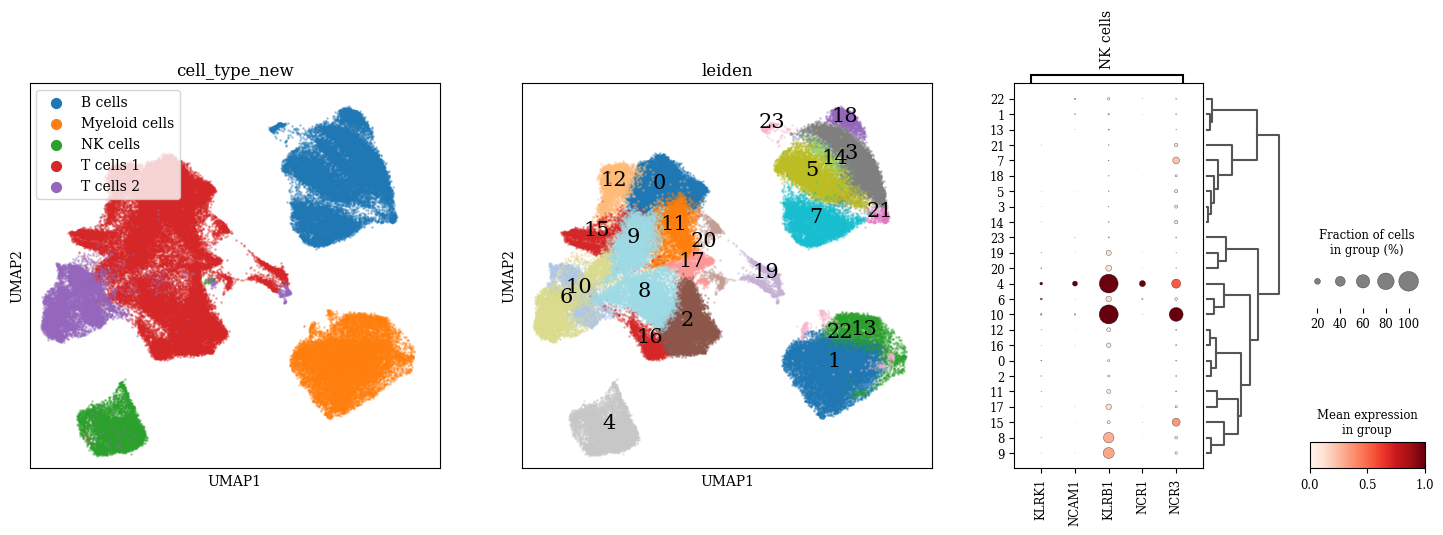

<Figure size 640x480 with 0 Axes>

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
donor_i = 0
plot_umap(adatas_all[donor_i], color='cell_type_new', ax=axes[0], groups=None, color_map=None, s=1, mask_group=None, legend_loc='upper left')
plot_umap(adatas_all[donor_i], color='leiden', ax=axes[1], groups=None, color_map=None, s=1, mask_group=None)
sc.pl.dotplot(
    adatas_all[donor_i],
    var_names={
        'NK cells': NK_markers
    },  # gene names grouped by cell type in a dictionary
    groupby="leiden",
    standard_scale="var",  # normalize gene scores from 0 to 1,
    dendrogram=True,
    figsize=(5,5),
    ax=axes[2]
    
)
plt.tight_layout()

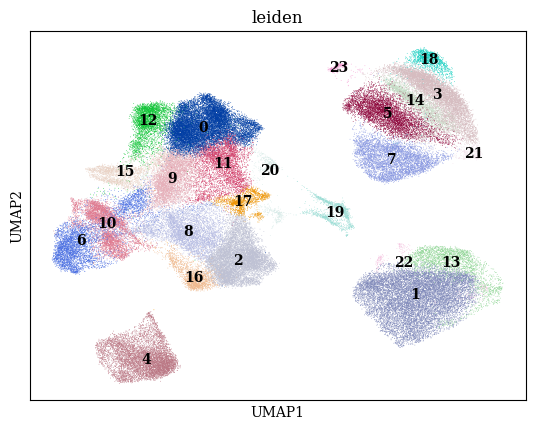

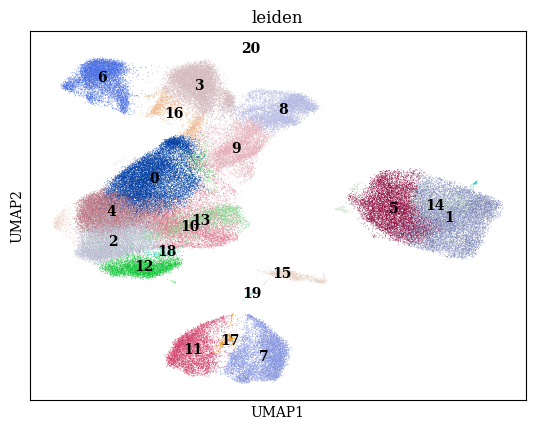

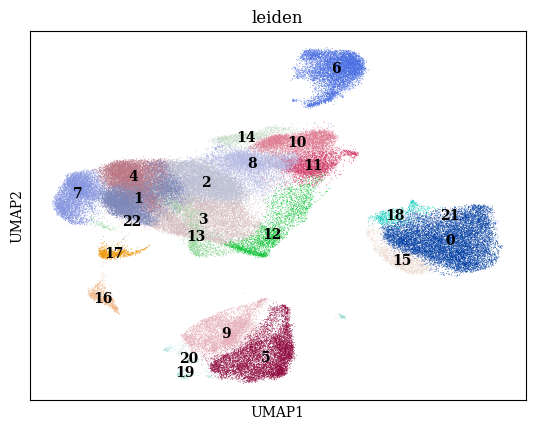

In [77]:
sc.pl.umap(adatas_all[0], color='cell_type')
sc.pl.umap(adatas_all[1], color='leiden', legend_loc='on data')
sc.pl.umap(adatas_all[2], color='leiden', legend_loc='on data')

In [128]:
# sc.pl.umap(adatas_all[0], color='cell_type')
# sc.pl.umap(adatas_all[1], color='cell_type')
# sc.pl.umap(adatas_all[2], color='cell_type')

## filtering

In [7]:
unique_cell_types = np.unique(np.concatenate([adata.obs['cell_type_celltypist_fine'].unique() for adata in adatas_all]))
cmap = plt.get_cmap('tab20')  # Use a color map with more distinct colors
num_colors = len(unique_cell_types)
color_list = cmap(np.linspace(0, 1, num_colors))
color_map_celltypes = {unique_cell_types[i]:list(color_list[i]) for i in range(num_colors)}

color_map_celltypes = {**color_map_celltypes, **{'B cells': 'blue', 'Myeloid cells':'orange', 'NK cells':'brown', 'T cells 1':'green', 'T cells 2':'red'}}

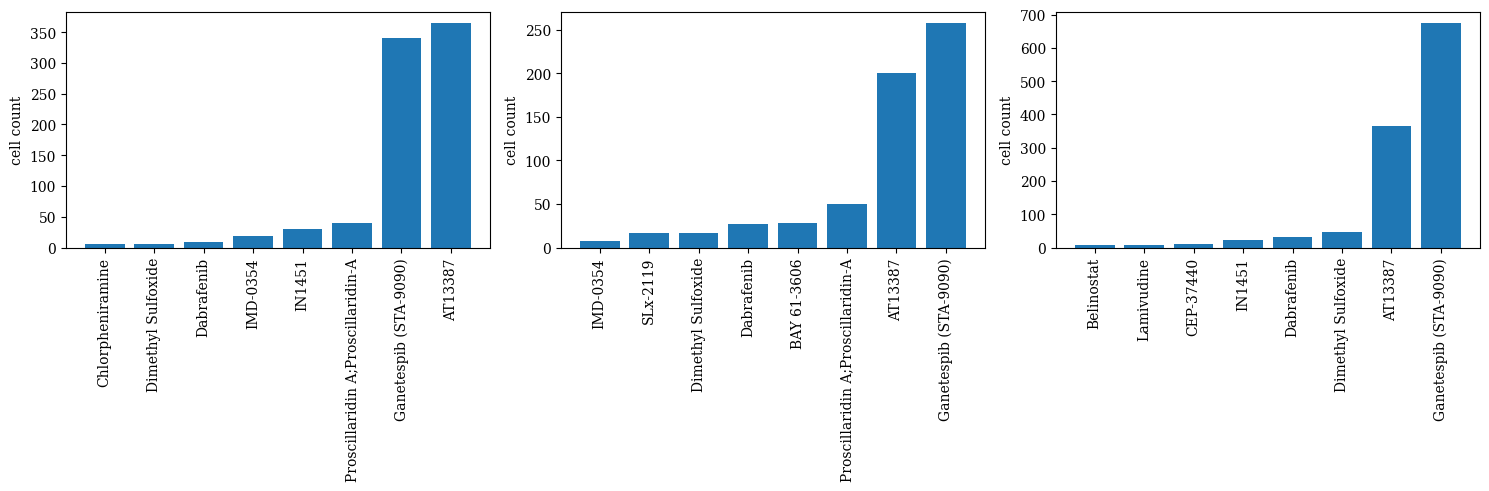

In [157]:
# outlier clusters
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

outlier_clusters = {0: ['19', '20', '23'],
                    1: ['15', '19', '20'],
                    2: ['16', '17', '19', '20']}
def bar_plot(df,ax):
    ax.bar(df.index, height=df.values)
    ax.tick_params(axis='x', rotation=90)
    ax.set_ylabel('cell count')

for i, adata in enumerate(adatas_all_f1):
    mask_cluster = adata.obs.leiden.isin(outlier_clusters[i])
    df = adata.obs.loc[mask_cluster,:].groupby('sm_name').size()
    df = df.sort_values()[-8:,]
    bar_plot(df, axes[i])
plt.tight_layout()

### Outliers 1

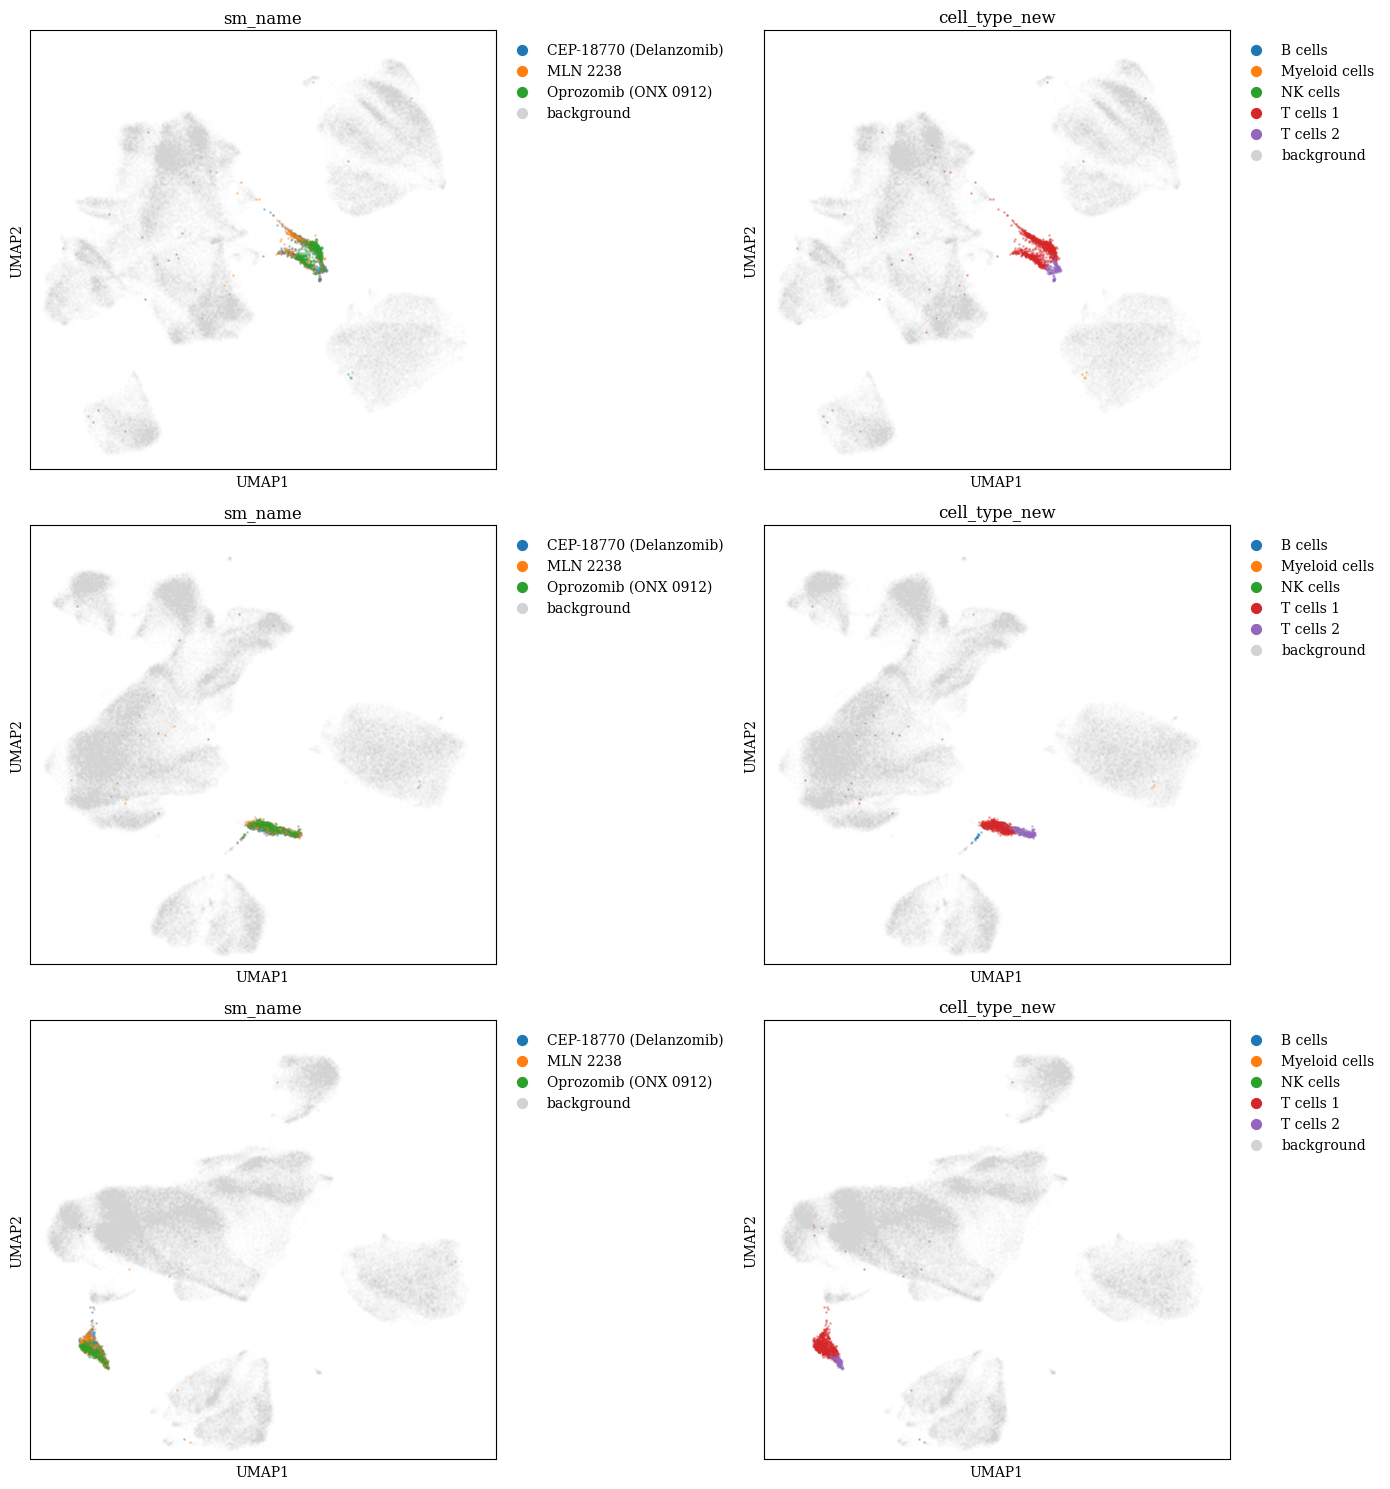

In [235]:
new_outliers_1 = ['CEP-18770 (Delanzomib)', 'MLN 2238', 'Oprozomib (ONX 0912)']
masks = [adata.obs.sm_name.isin(new_outliers_1) for adata in adatas_all]
fig = plot_umap_group_group(adatas_all, ["sm_name", "cell_type_new" ], mask_groups=masks)

In [237]:
fig.savefig("outliers_1.png", dpi=300)

In [156]:
# after removing outliers 1
adatas_all_f1 = [adata[~adata.obs.sm_name.isin(new_outliers_1),:] for adata in adatas_all]
fig = plot_umap_group_group(adatas_all_f1, ["cell_type_celltypist_fine", "cell_type_new" ], color_map=color_map_celltypes)

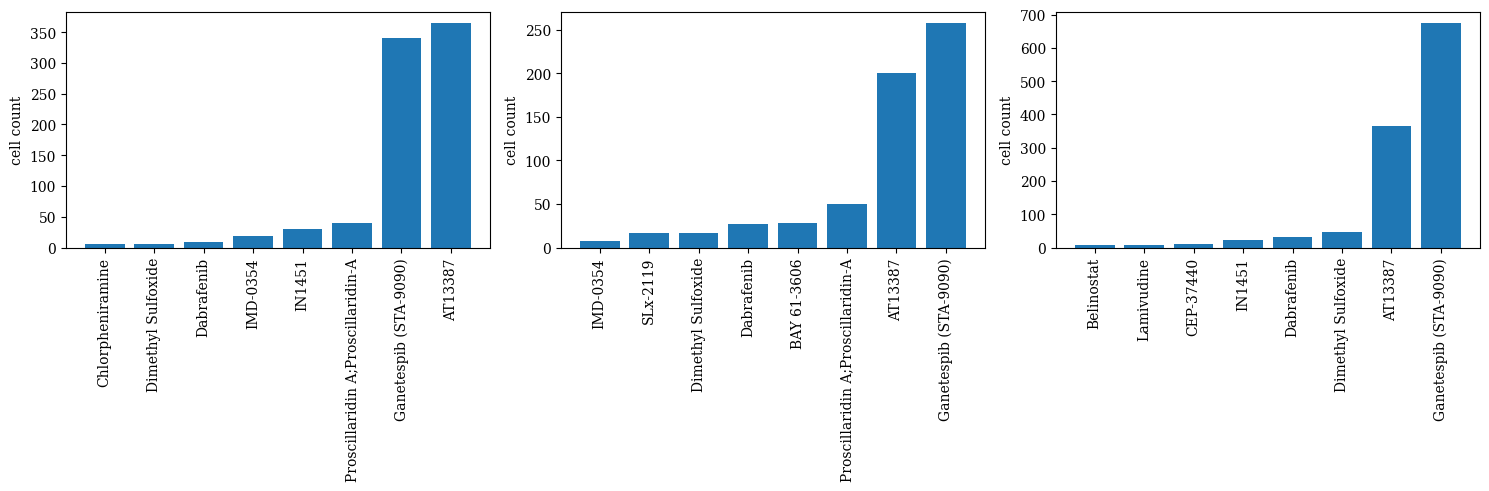

In [160]:
# outlier clusters
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, adata in enumerate(adatas_all_f1):
    mask_cluster = adata.obs.leiden.isin(outlier_clusters[i])
    df = adata.obs.loc[mask_cluster,:].groupby('sm_name').size()
    df = df.sort_values()[-8:,]
    bar_plot(df, axes[i])
plt.tight_layout()
    

In [ ]:
new_outliers_2 = ['Ganetespib (STA-9090)', 'AT13387']

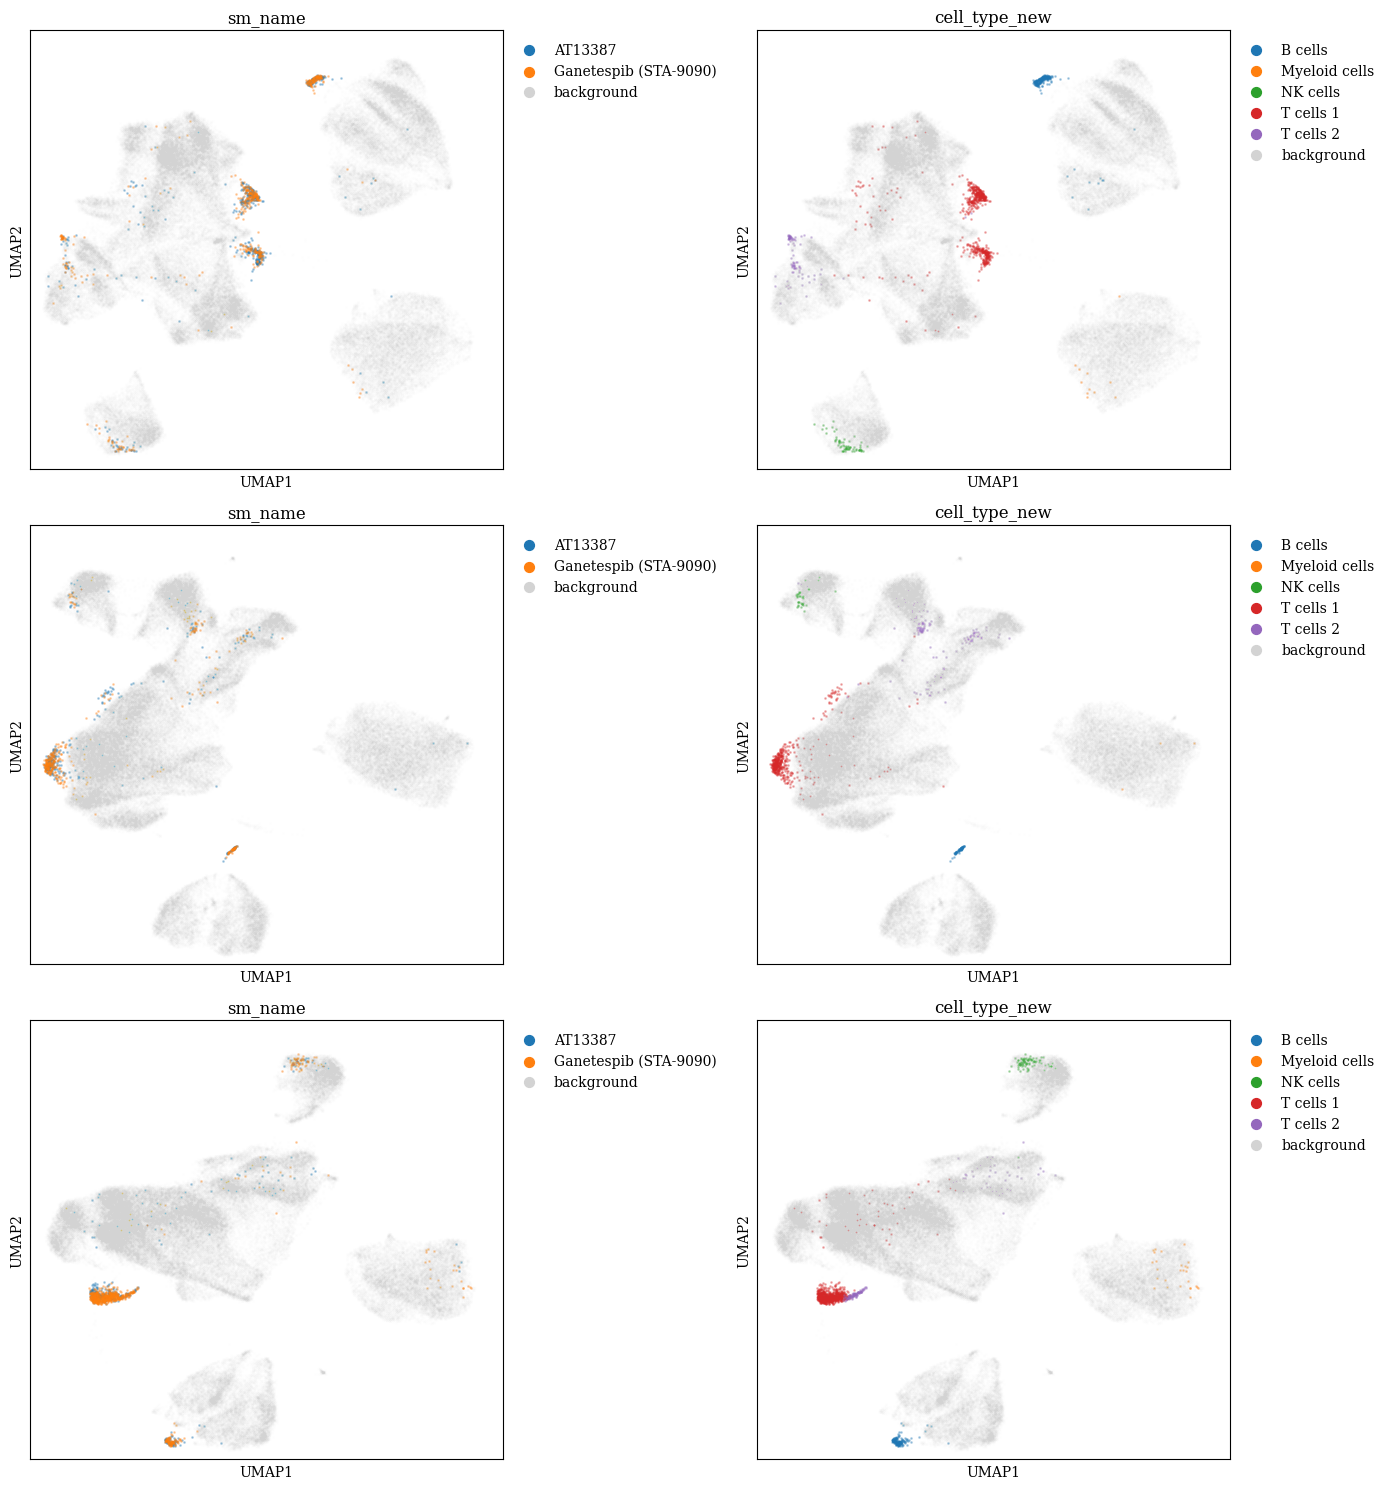

In [101]:

masks = [adata.obs.sm_name.isin(new_outliers_2) for adata in adatas_all_f1]
fig = plot_umap_group_group(adatas_all, ["sm_name", "cell_type_new" ], mask_groups=masks)

In [102]:
fig.savefig('outliers_2.png', dpi=300)

In [158]:
adatas_all_f2 = [adata[~adata.obs.sm_name.isin(new_outliers_2),:] for adata in adatas_all_f1]

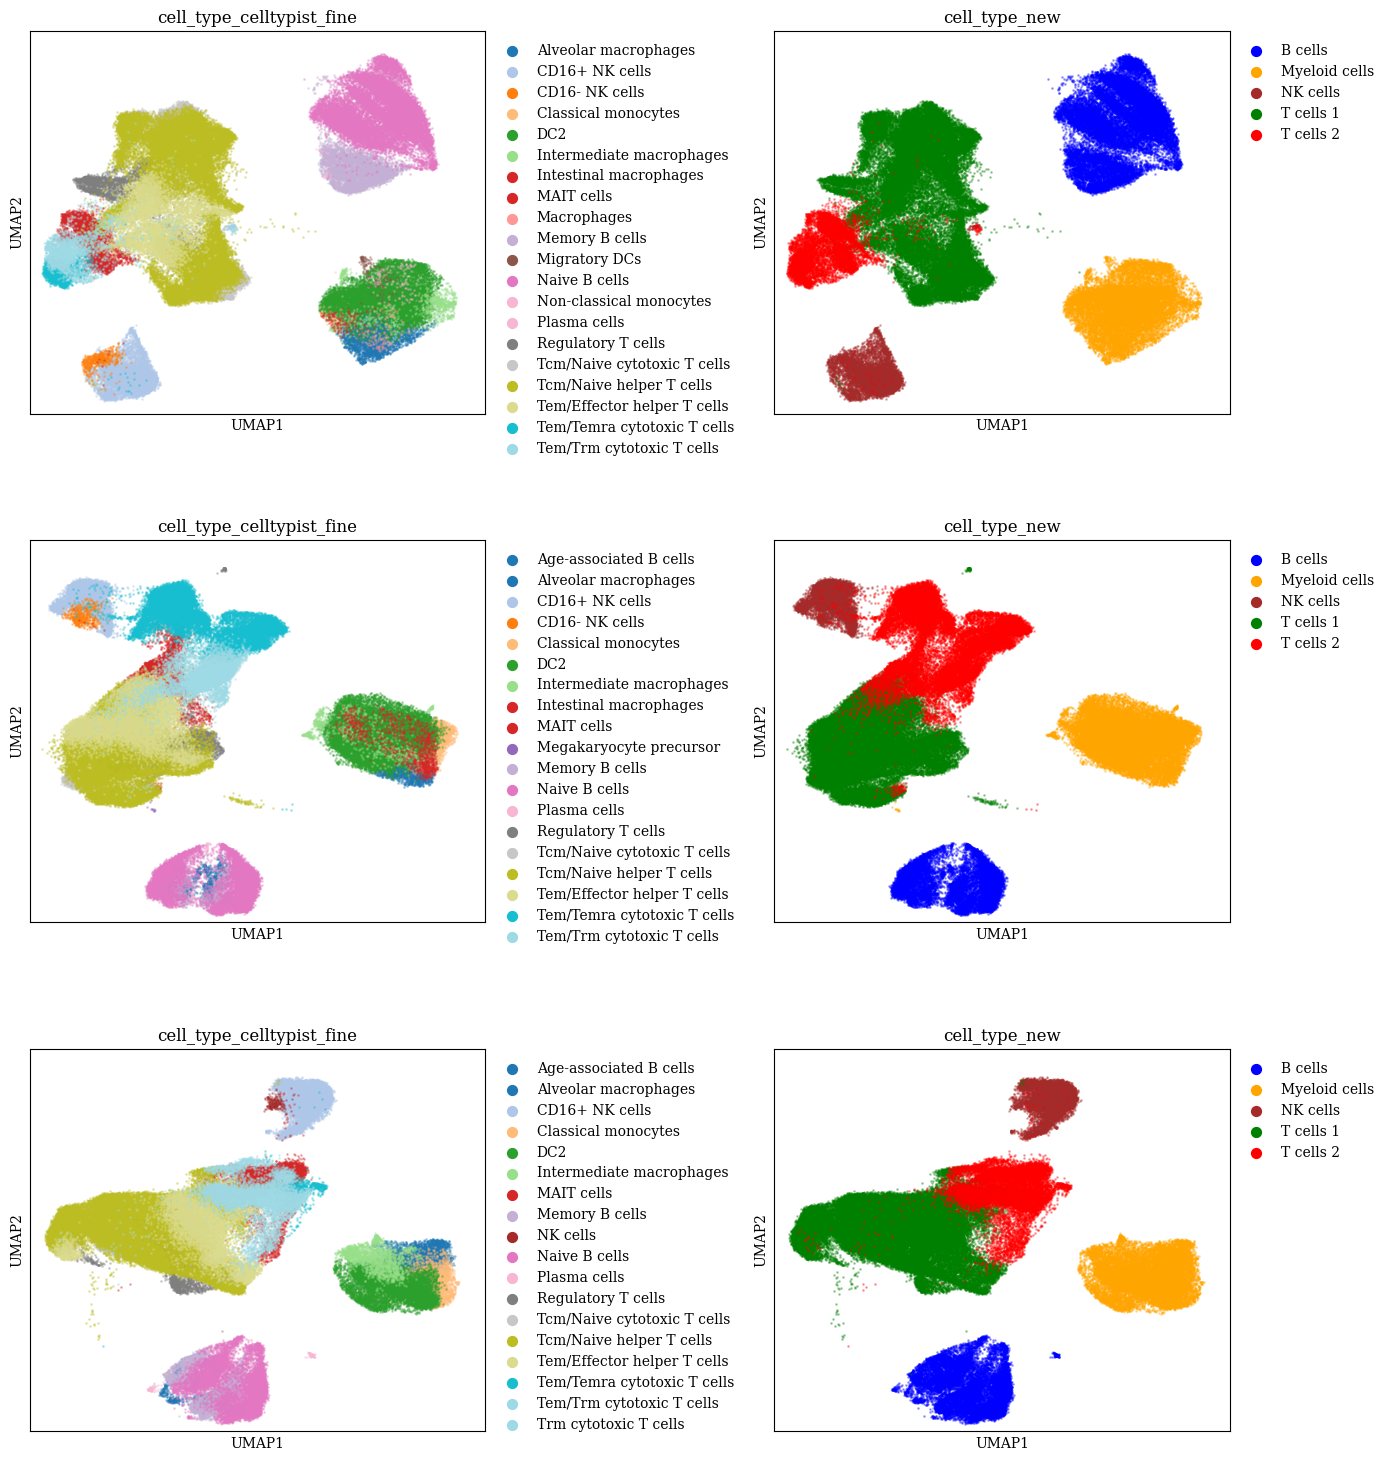

In [104]:
# after removing outliers 2
fig = plot_umap_group_group(adatas_all_f2, ["cell_type_celltypist_fine", "cell_type_new" ], color_map=color_map_celltypes)

Index(['I-BET151', 'Quizartinib', 'Chlorpheniramine', 'Dimethyl Sulfoxide',
       'Dabrafenib', 'IMD-0354', 'IN1451',
       'Proscillaridin A;Proscillaridin-A'],
      dtype='object', name='sm_name')
Index(['Colforsin', 'IMD-0354', 'Quizartinib', 'SLx-2119',
       'Dimethyl Sulfoxide', 'Dabrafenib', 'BAY 61-3606',
       'Proscillaridin A;Proscillaridin-A'],
      dtype='object', name='sm_name')
Index(['BAY 61-3606', 'PF-04691502', 'Lamivudine', 'Belinostat', 'CEP-37440',
       'IN1451', 'Dabrafenib', 'Dimethyl Sulfoxide'],
      dtype='object', name='sm_name')


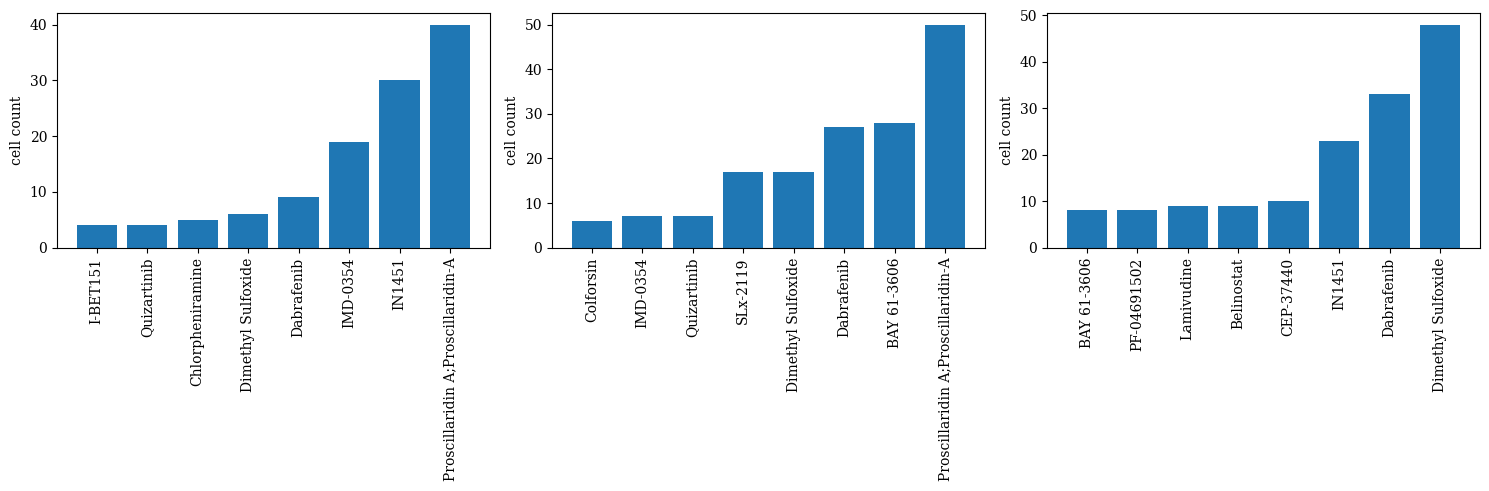

In [106]:
# outlier clusters
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, adata in enumerate(adatas_all_f2):
    mask_cluster = adata.obs.leiden.isin(outlier_clusters[i])
    df = adata.obs.loc[mask_cluster,:].groupby('sm_name').size()
    df = df.sort_values()[-8:,]
    print(df.index.astype(str))
    bar_plot(df, axes[i])
plt.tight_layout()

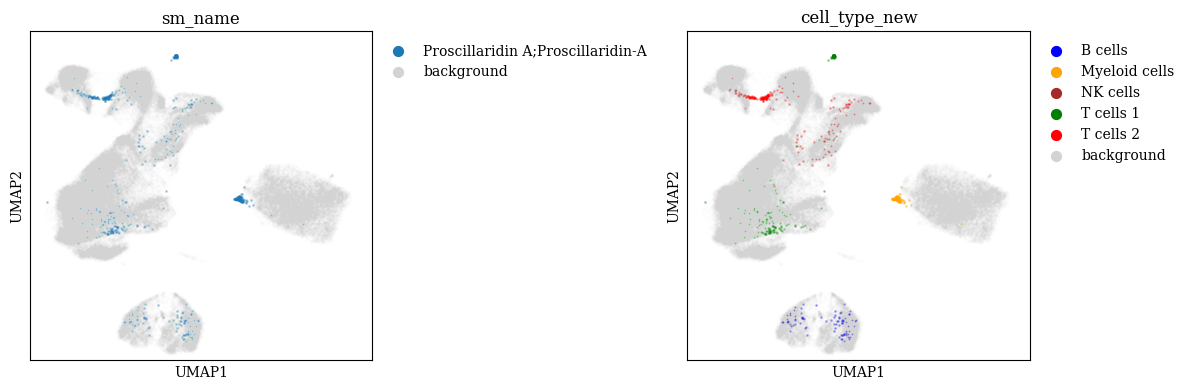

In [123]:
donor_id = 1
mask = adatas_all_f2[donor_id].obs.sm_name.isin(['Proscillaridin A;Proscillaridin-A']) #problem with donor 2

fig = plot_umap_group(adatas_all_f2[donor_id], ["sm_name", "cell_type_new" ], mask_group=mask, color_map=color_map_celltypes)

In [133]:
# remove 'Proscillaridin A;Proscillaridin-A', donor 2
adata = adatas_all_f2[1]
adatas_all_f2[1] = adatas_all_f2[1][adatas_all_f2[1].obs.sm_name!='Proscillaridin A;Proscillaridin-A', :]

View of AnnData object with n_obs × n_vars = 101814 × 18248
    obs: 'dose_uM', 'timepoint_hr', 'well', 'row', 'col', 'plate_name', 'cell_id', 'cell_type', 'split', 'donor_id', 'sm_name', 'control', 'SMILES', 'sm_lincs_id', 'library_id', 'plate_well_cell_type', 'positive_ctr', 'leiden', 'cell_type_celltypist_coarse', 'conf_score_celltypist_coarse', 'cell_type_celltypist_fine', 'conf_score_celltypist_fine', 'cell_type_new'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_new_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'dendrogram_leiden', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

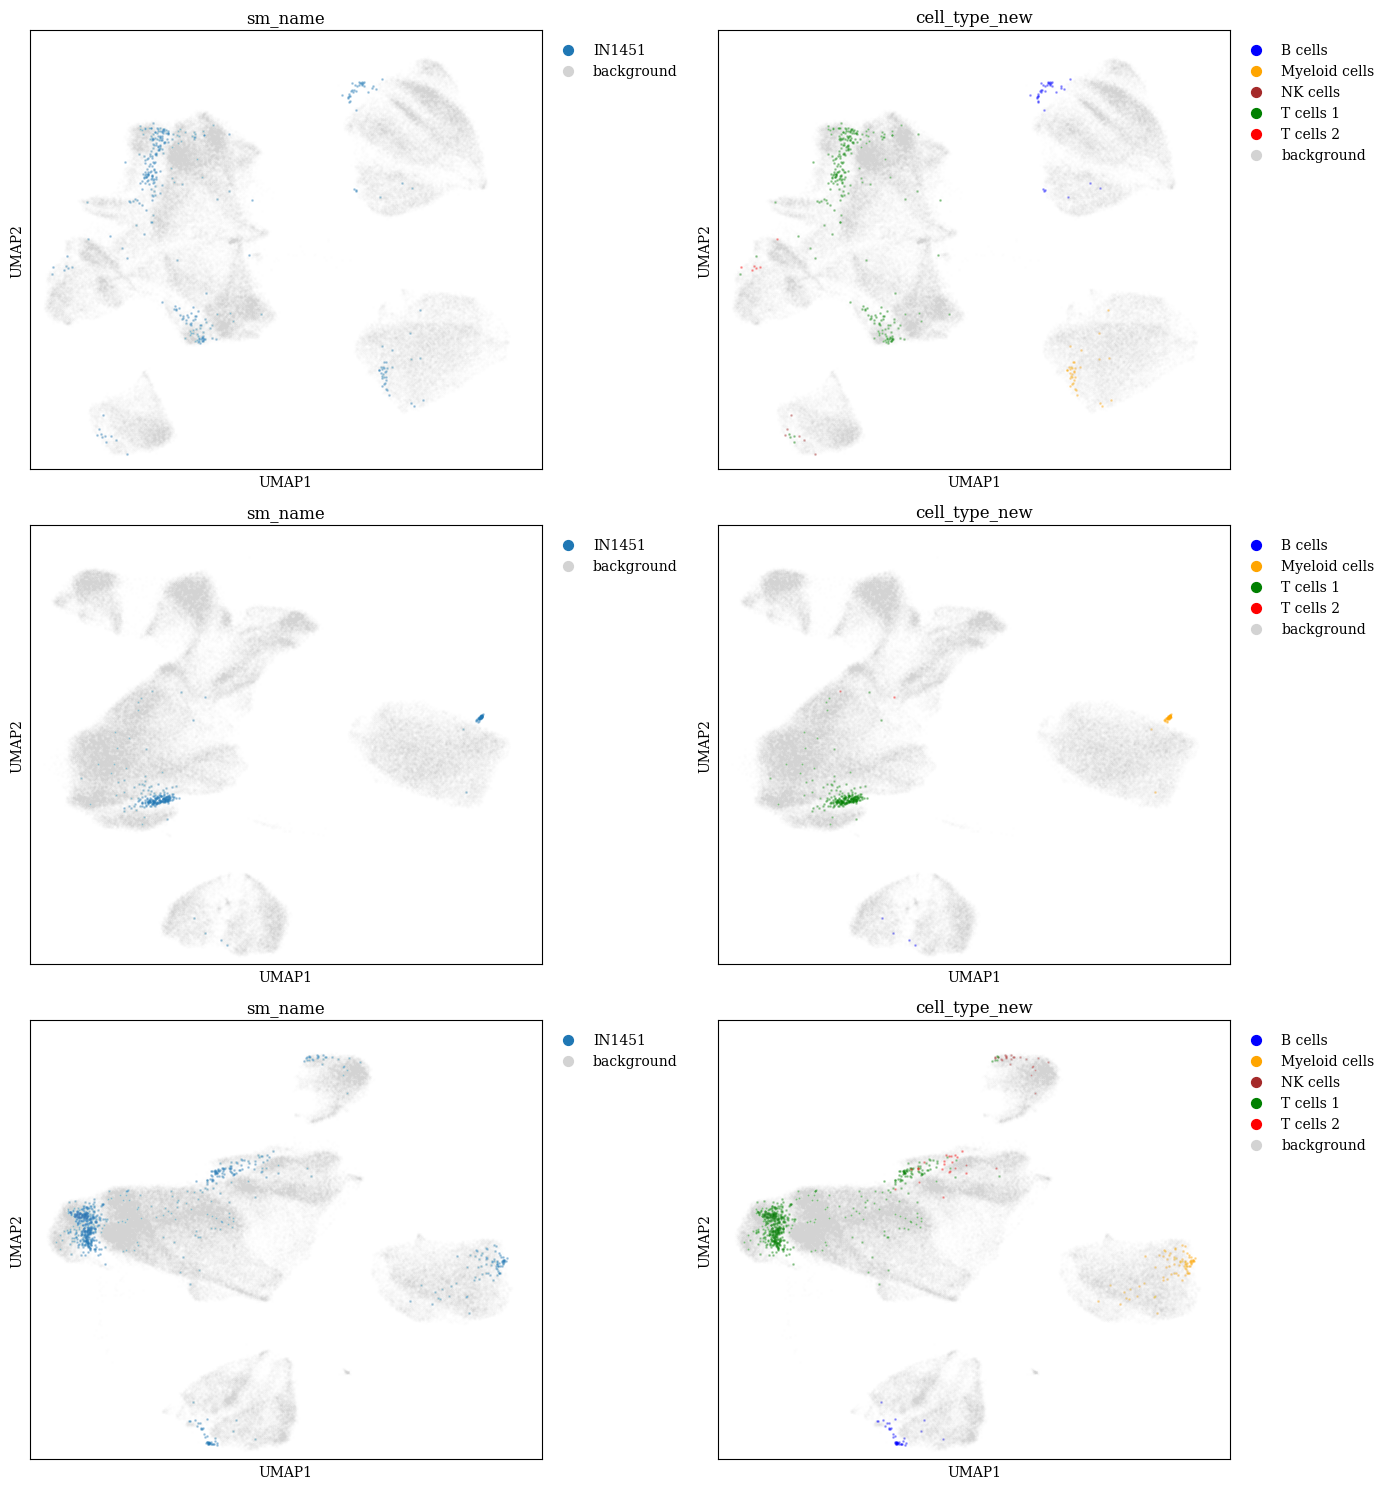

In [142]:
masks = [adata.obs.sm_name.isin(['IN1451']) for adata in adatas_all_f2] 
#shows dominantly T cell 1 and less T cells 2 and NK cells. Solution, either remove the compound, or remove donor 2 and change annotation on NK cells and T cells2
fig = plot_umap_group_group(adatas_all_f2, ["sm_name", "cell_type_new" ], mask_groups=masks, color_map=color_map_celltypes)
    

In [144]:
fig.savefig('IN1451.png', dpi=200)

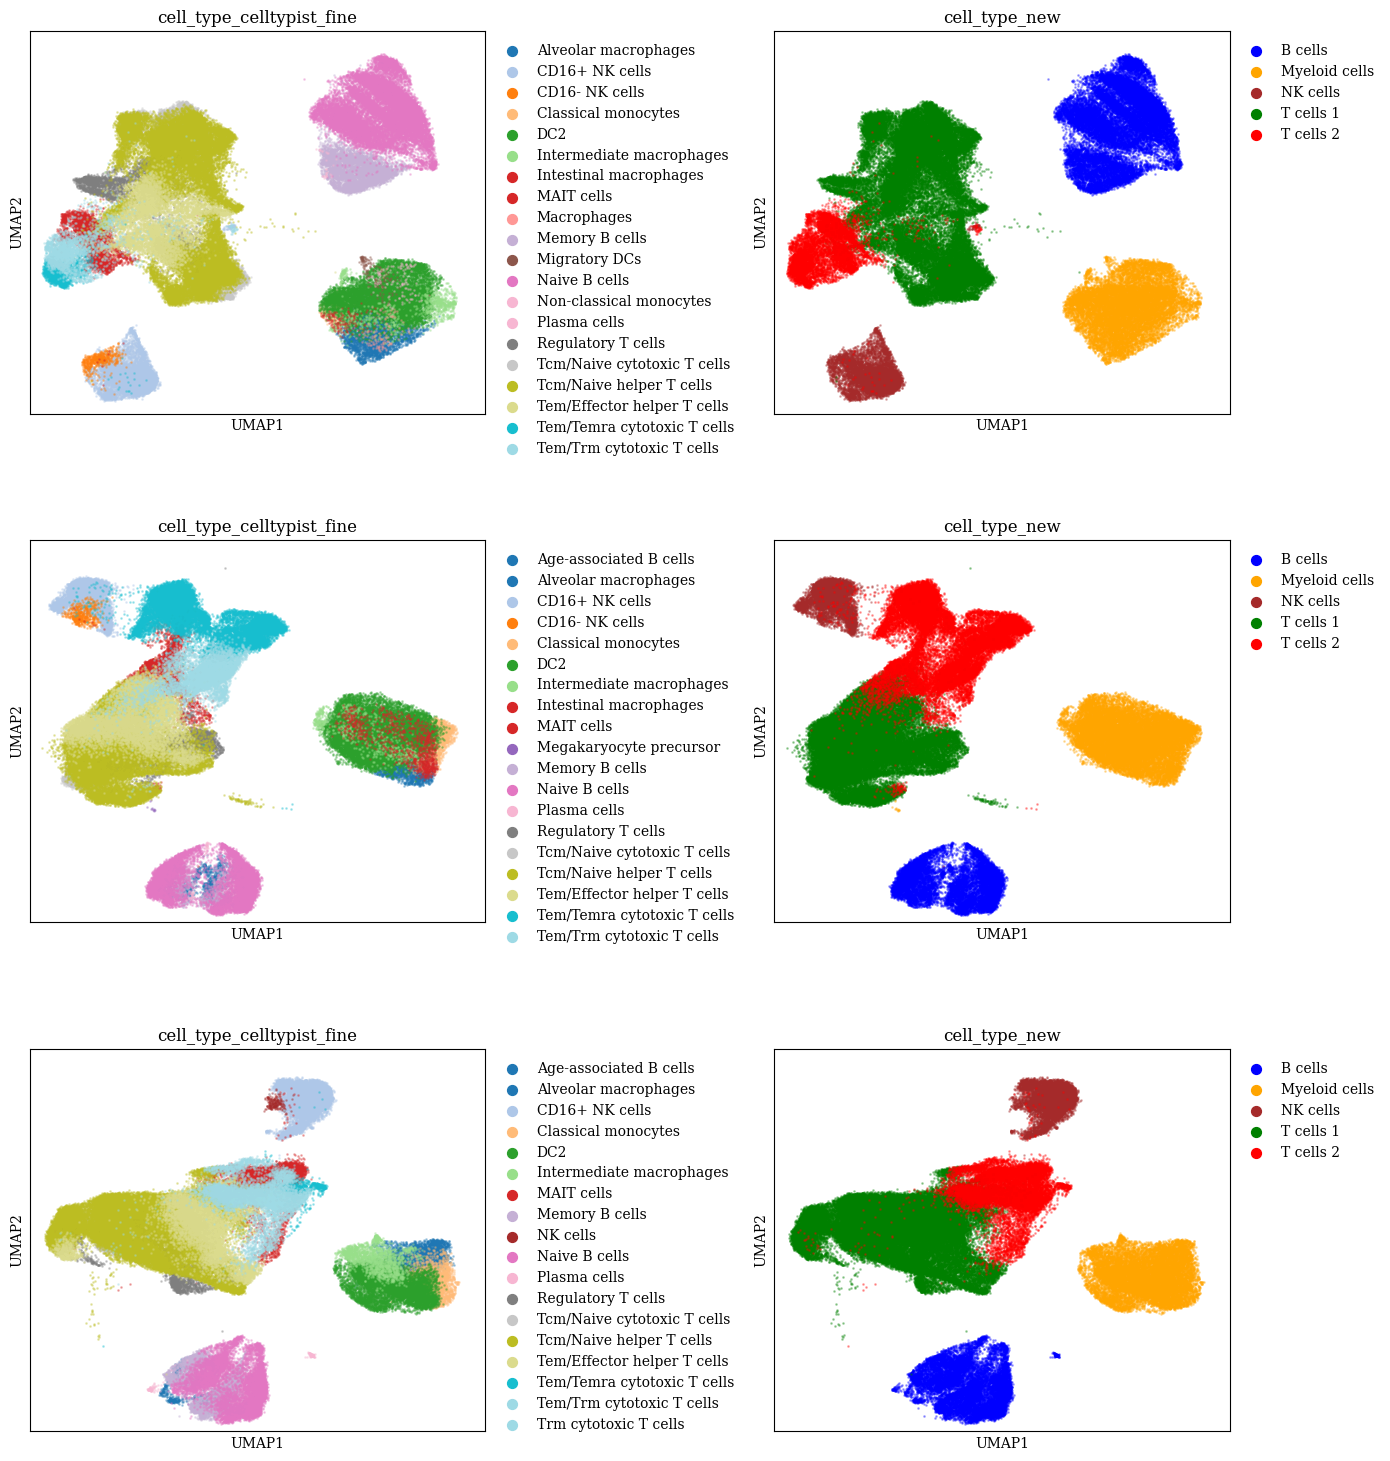

In [145]:
adatas_all_f3 = [adata[~adata.obs.sm_name.isin(['IN1451']),:] for adata in adatas_all_f2]
fig = plot_umap_group_group(adatas_all_f3, ["cell_type_celltypist_fine", "cell_type_new" ], color_map=color_map_celltypes)

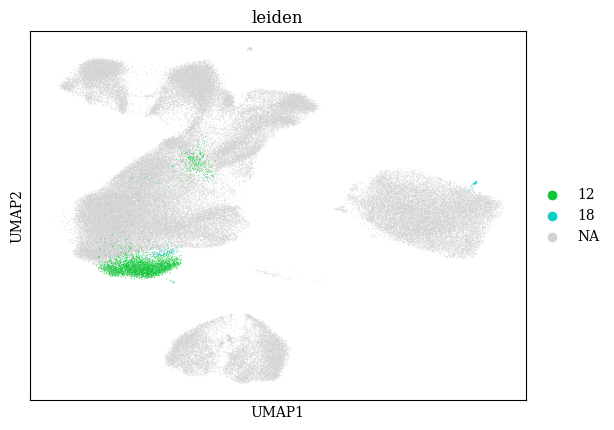

In [181]:
sc.pl.umap(adatas_all_f2[1], color='leiden', groups=['12','18'])

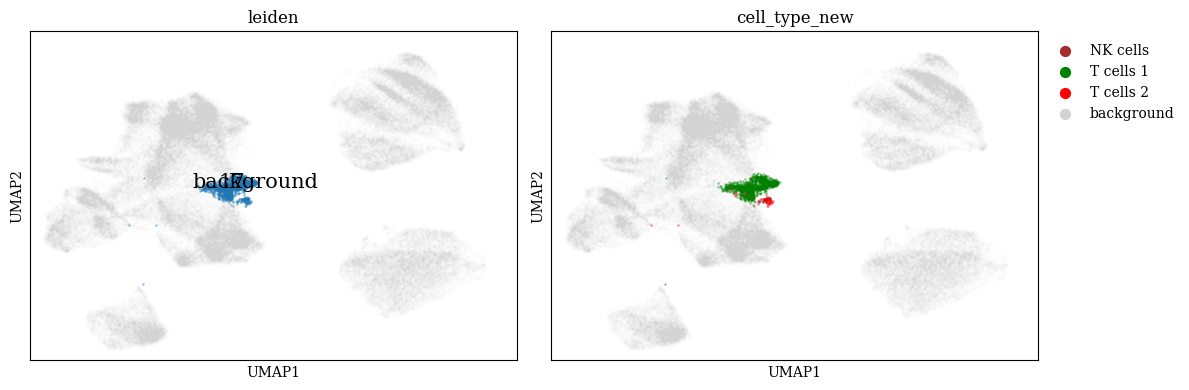

In [182]:
donor_id = 0
adata = adatas_all_f2[donor_id]
mask = adata.obs.leiden.isin(['17'])
fig = plot_umap_group(adata, ["leiden", "cell_type_new" ], mask_group=mask, color_map=color_map_celltypes)

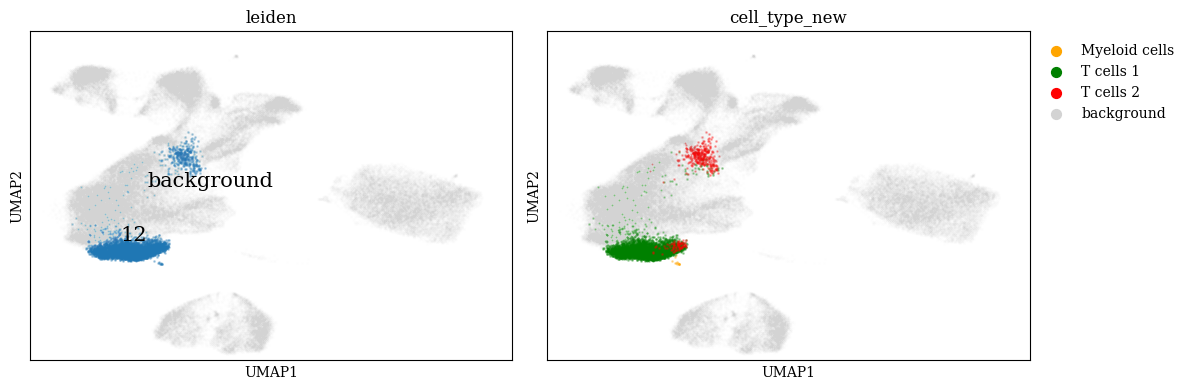

In [174]:
donor_id = 1
adata = adatas_all_f2[donor_id]
mask = adata.obs.leiden.isin(['12'])
fig = plot_umap_group(adata, ["leiden", "cell_type_new" ], mask_group=mask, color_map=color_map_celltypes)
    

In [138]:
all_outliers

array(['5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-6-yl)pyrimidin-2-amine',
       'ABT-199 (GDC-0199)', 'ABT737', 'AT 7867', 'AVL-292', 'AZ628',
       'AZD-8330', 'Alogliptin', 'BMS-536924', 'BX 912', 'Belinostat',
       'Bosutinib', 'Clemastine', 'Colchicine', 'Crizotinib',
       'Dabrafenib', 'Dactolisib', 'Dasatinib', 'Dimethyl Sulfoxide',
       'Doxorubicin', 'Flutamide', 'GSK256066', 'HYDROXYUREA', 'I-BET151',
       'IMD-0354', 'IN1451', 'Ketoconazole', 'LY2090314', 'Lamivudine',
       'Navitoclax', 'OSI-930', 'PF-03814735', 'PF-04691502',
       'Proscillaridin A;Proscillaridin-A', 'Resminostat', 'Ruxolitinib',
       'SLx-2119', 'Selumetinib', 'TPCA-1', 'Tacalcitol', 'Tamatinib',
       'Vardenafil', 'Vorinostat', 'YK 4-279'], dtype=object)

## compounds outliers

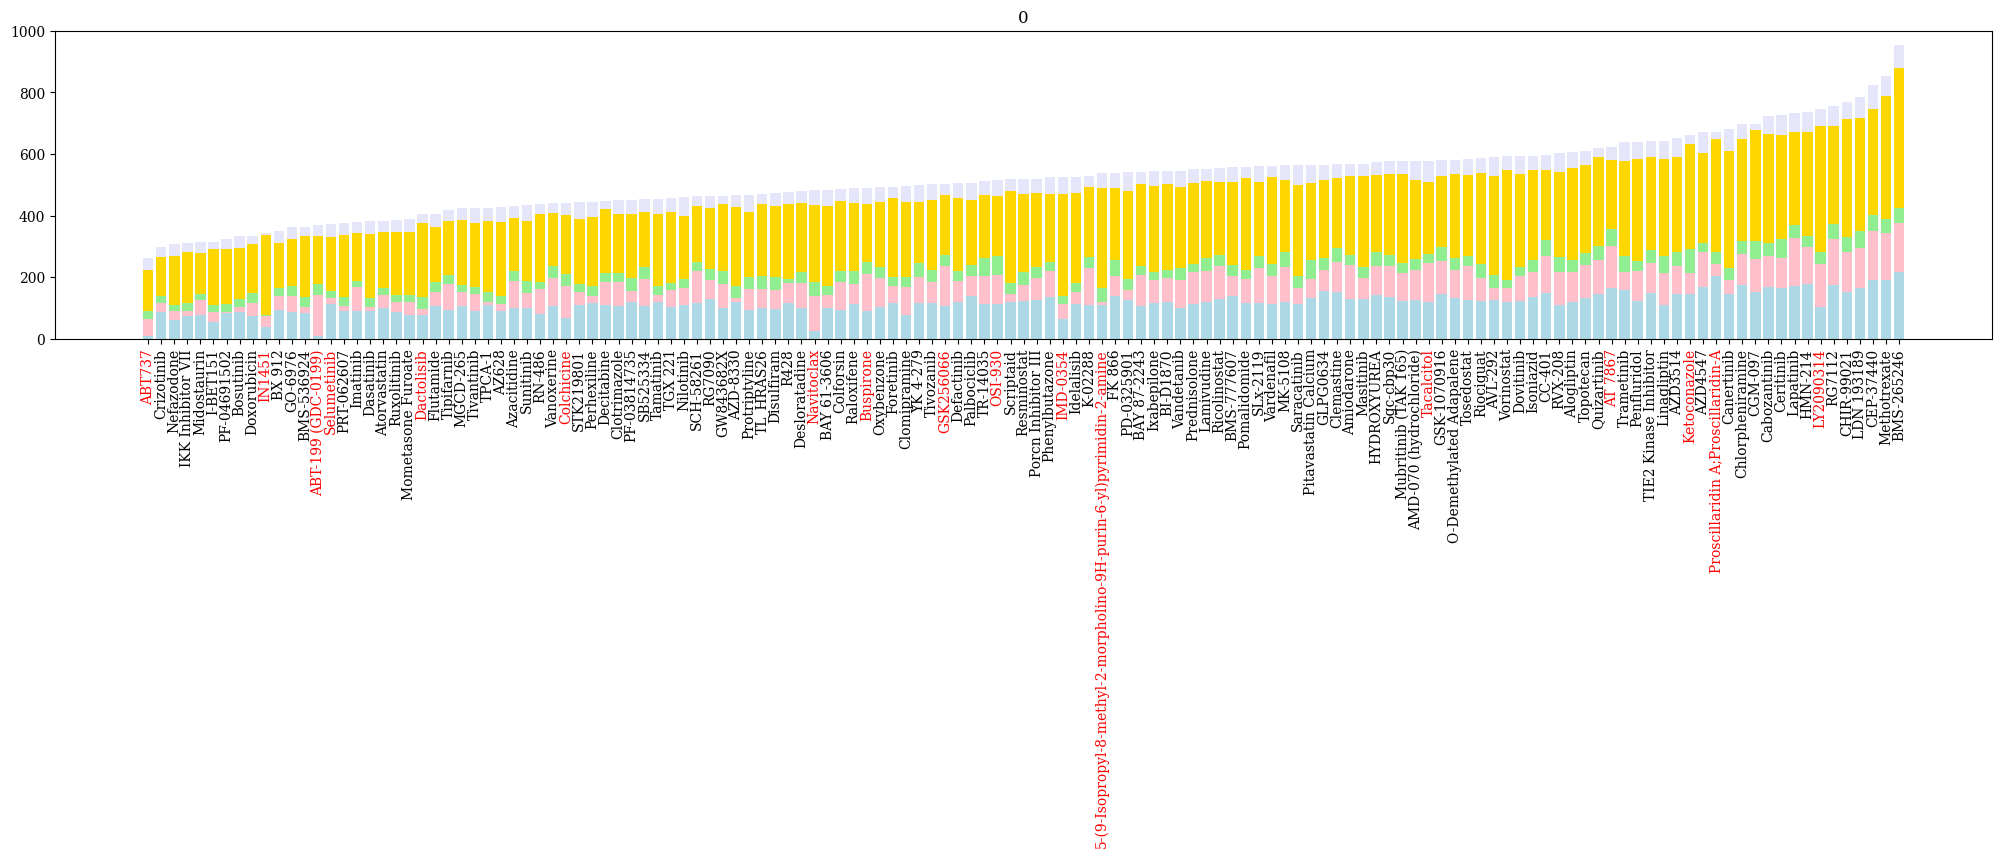

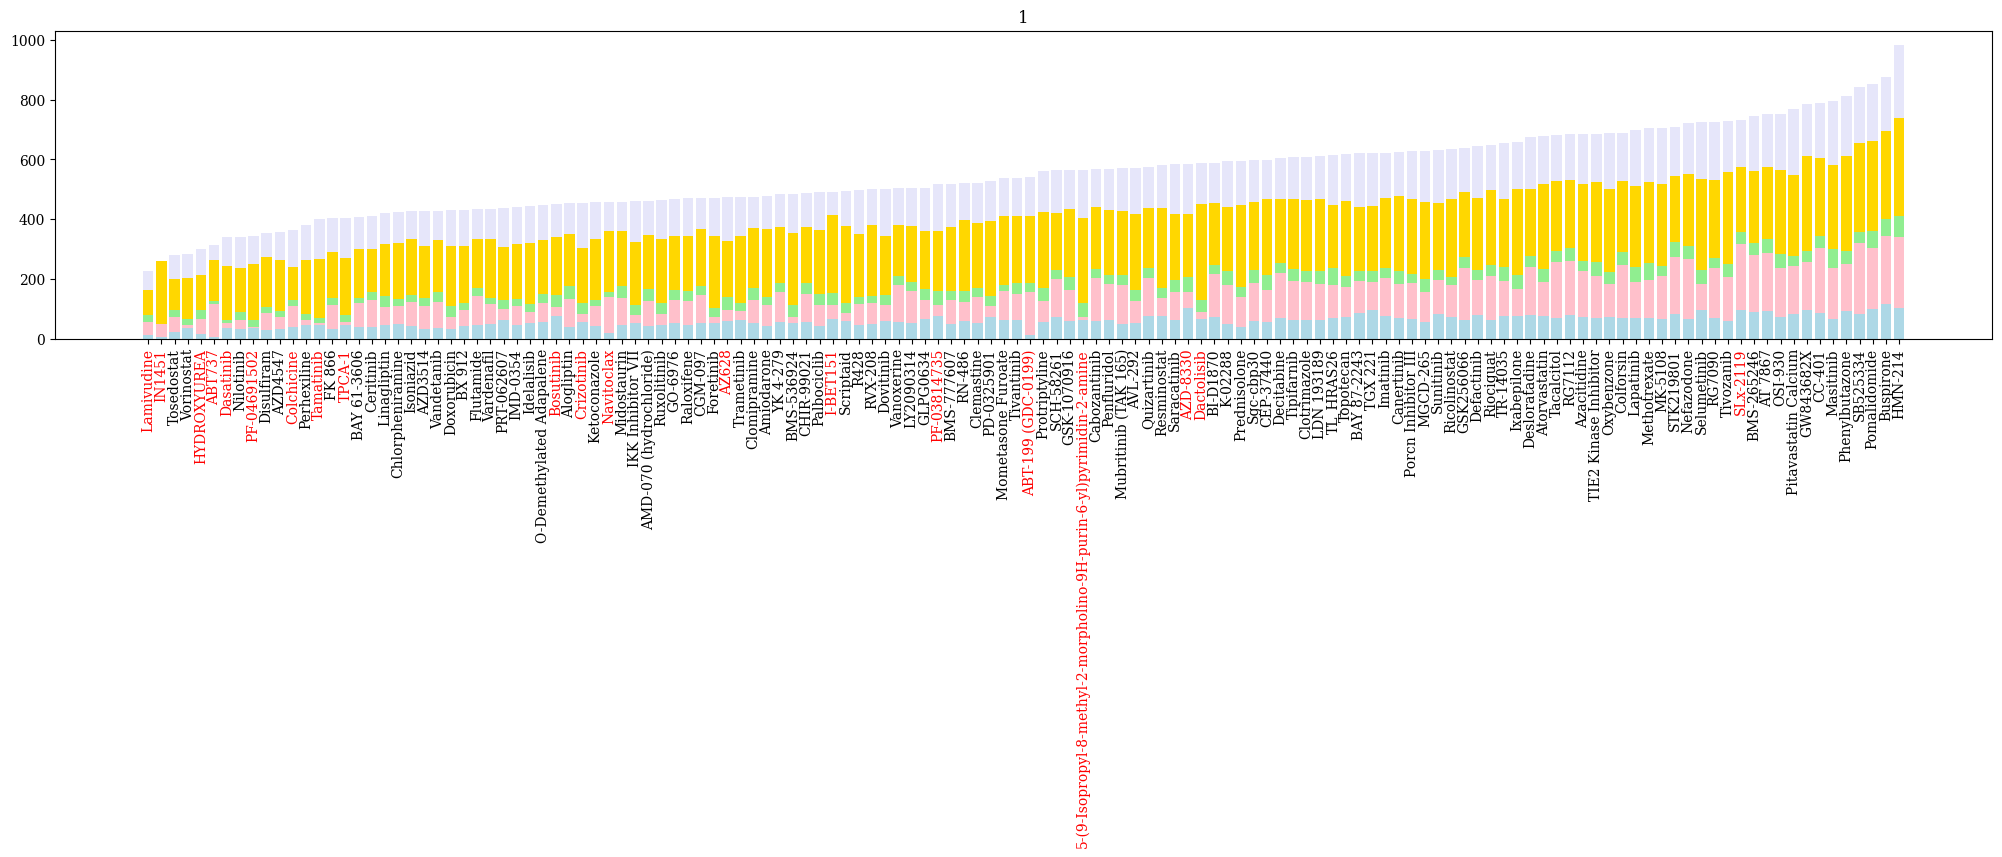

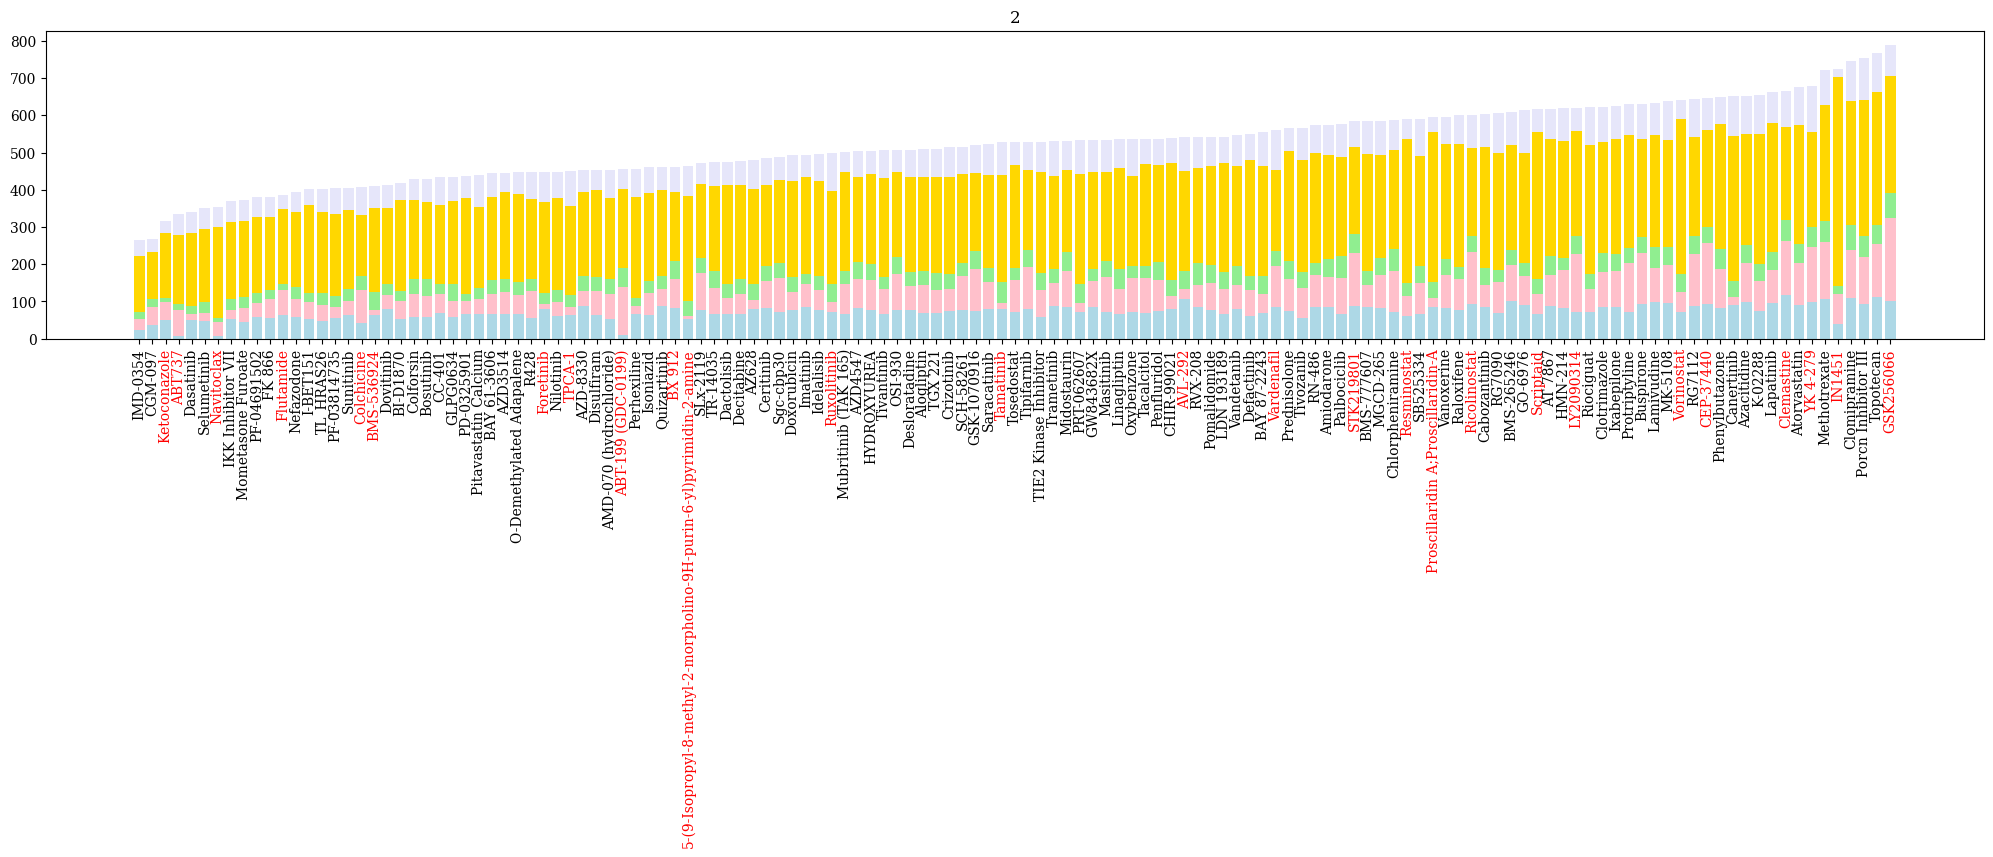

In [140]:
# identify outliers
outliers_list = []
for i_donor, adata in enumerate(adatas_all_f2):
    # subset and format data
    obs = adata.obs
    obs.sm_name = obs.sm_name.astype(str)
    obs = obs.loc[~obs.sm_name.isin(controls3), :]
    df_subset = obs.groupby(['sm_name', 'cell_type_new']).size().to_frame().reset_index()
    cell_count_m = df_subset.pivot(index='sm_name', columns='cell_type_new', values=0)
    cell_count_m = cell_count_m.fillna(0)

    # outlier 
    outliers = isolation_forest(df_subset, group=['sm_name'], cell_type_col='cell_type_new', values_col=0)  
    outliers_list.append(outliers)
    
    # save the order
    # if i_donor==0:
    cell_count_m['sum'] = cell_count_m.sum(axis=1)
    cell_count_m = cell_count_m.sort_values('sum')
    cell_count_m = cell_count_m.drop(columns='sum')
    saved_order = cell_count_m.index
        
    # else:
    #     cell_count_m = cell_count_m.reindex(saved_order)

    colors = []
    for label in cell_count_m.index.values:
        if label in outliers:
            colors.append('red')
        else:
            colors.append('black')
    plot_stacked_bar_chart(cell_count_m, title=i_donor, xticklabels=cell_count_m.index.values, colors=colors, figsize=(25, 4))

In [137]:
all_outliers = np.unique(np.concatenate(outliers_list))
common_outliers = list(set(outliers_list[0]).intersection(outliers_list[1], outliers_list[2]))
common_outliers

['Colchicine',
 'ABT737',
 'IN1451',
 'ABT-199 (GDC-0199)',
 'Dabrafenib',
 'Navitoclax',
 'Dimethyl Sulfoxide',
 'Belinostat',
 '5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-6-yl)pyrimidin-2-amine']

In [250]:
unique_cell_types = np.unique(np.concatenate([adata.obs['cell_type_new'].unique() for adata in adatas_all]))

cmap = plt.get_cmap('tab20')  # Use a color map with more distinct colors
num_colors = len(unique_cell_types)
color_list = cmap(np.linspace(0, 1, num_colors))
color_map = {unique_cell_types[i]:list(color_list[i]) for i in range(num_colors)}

5


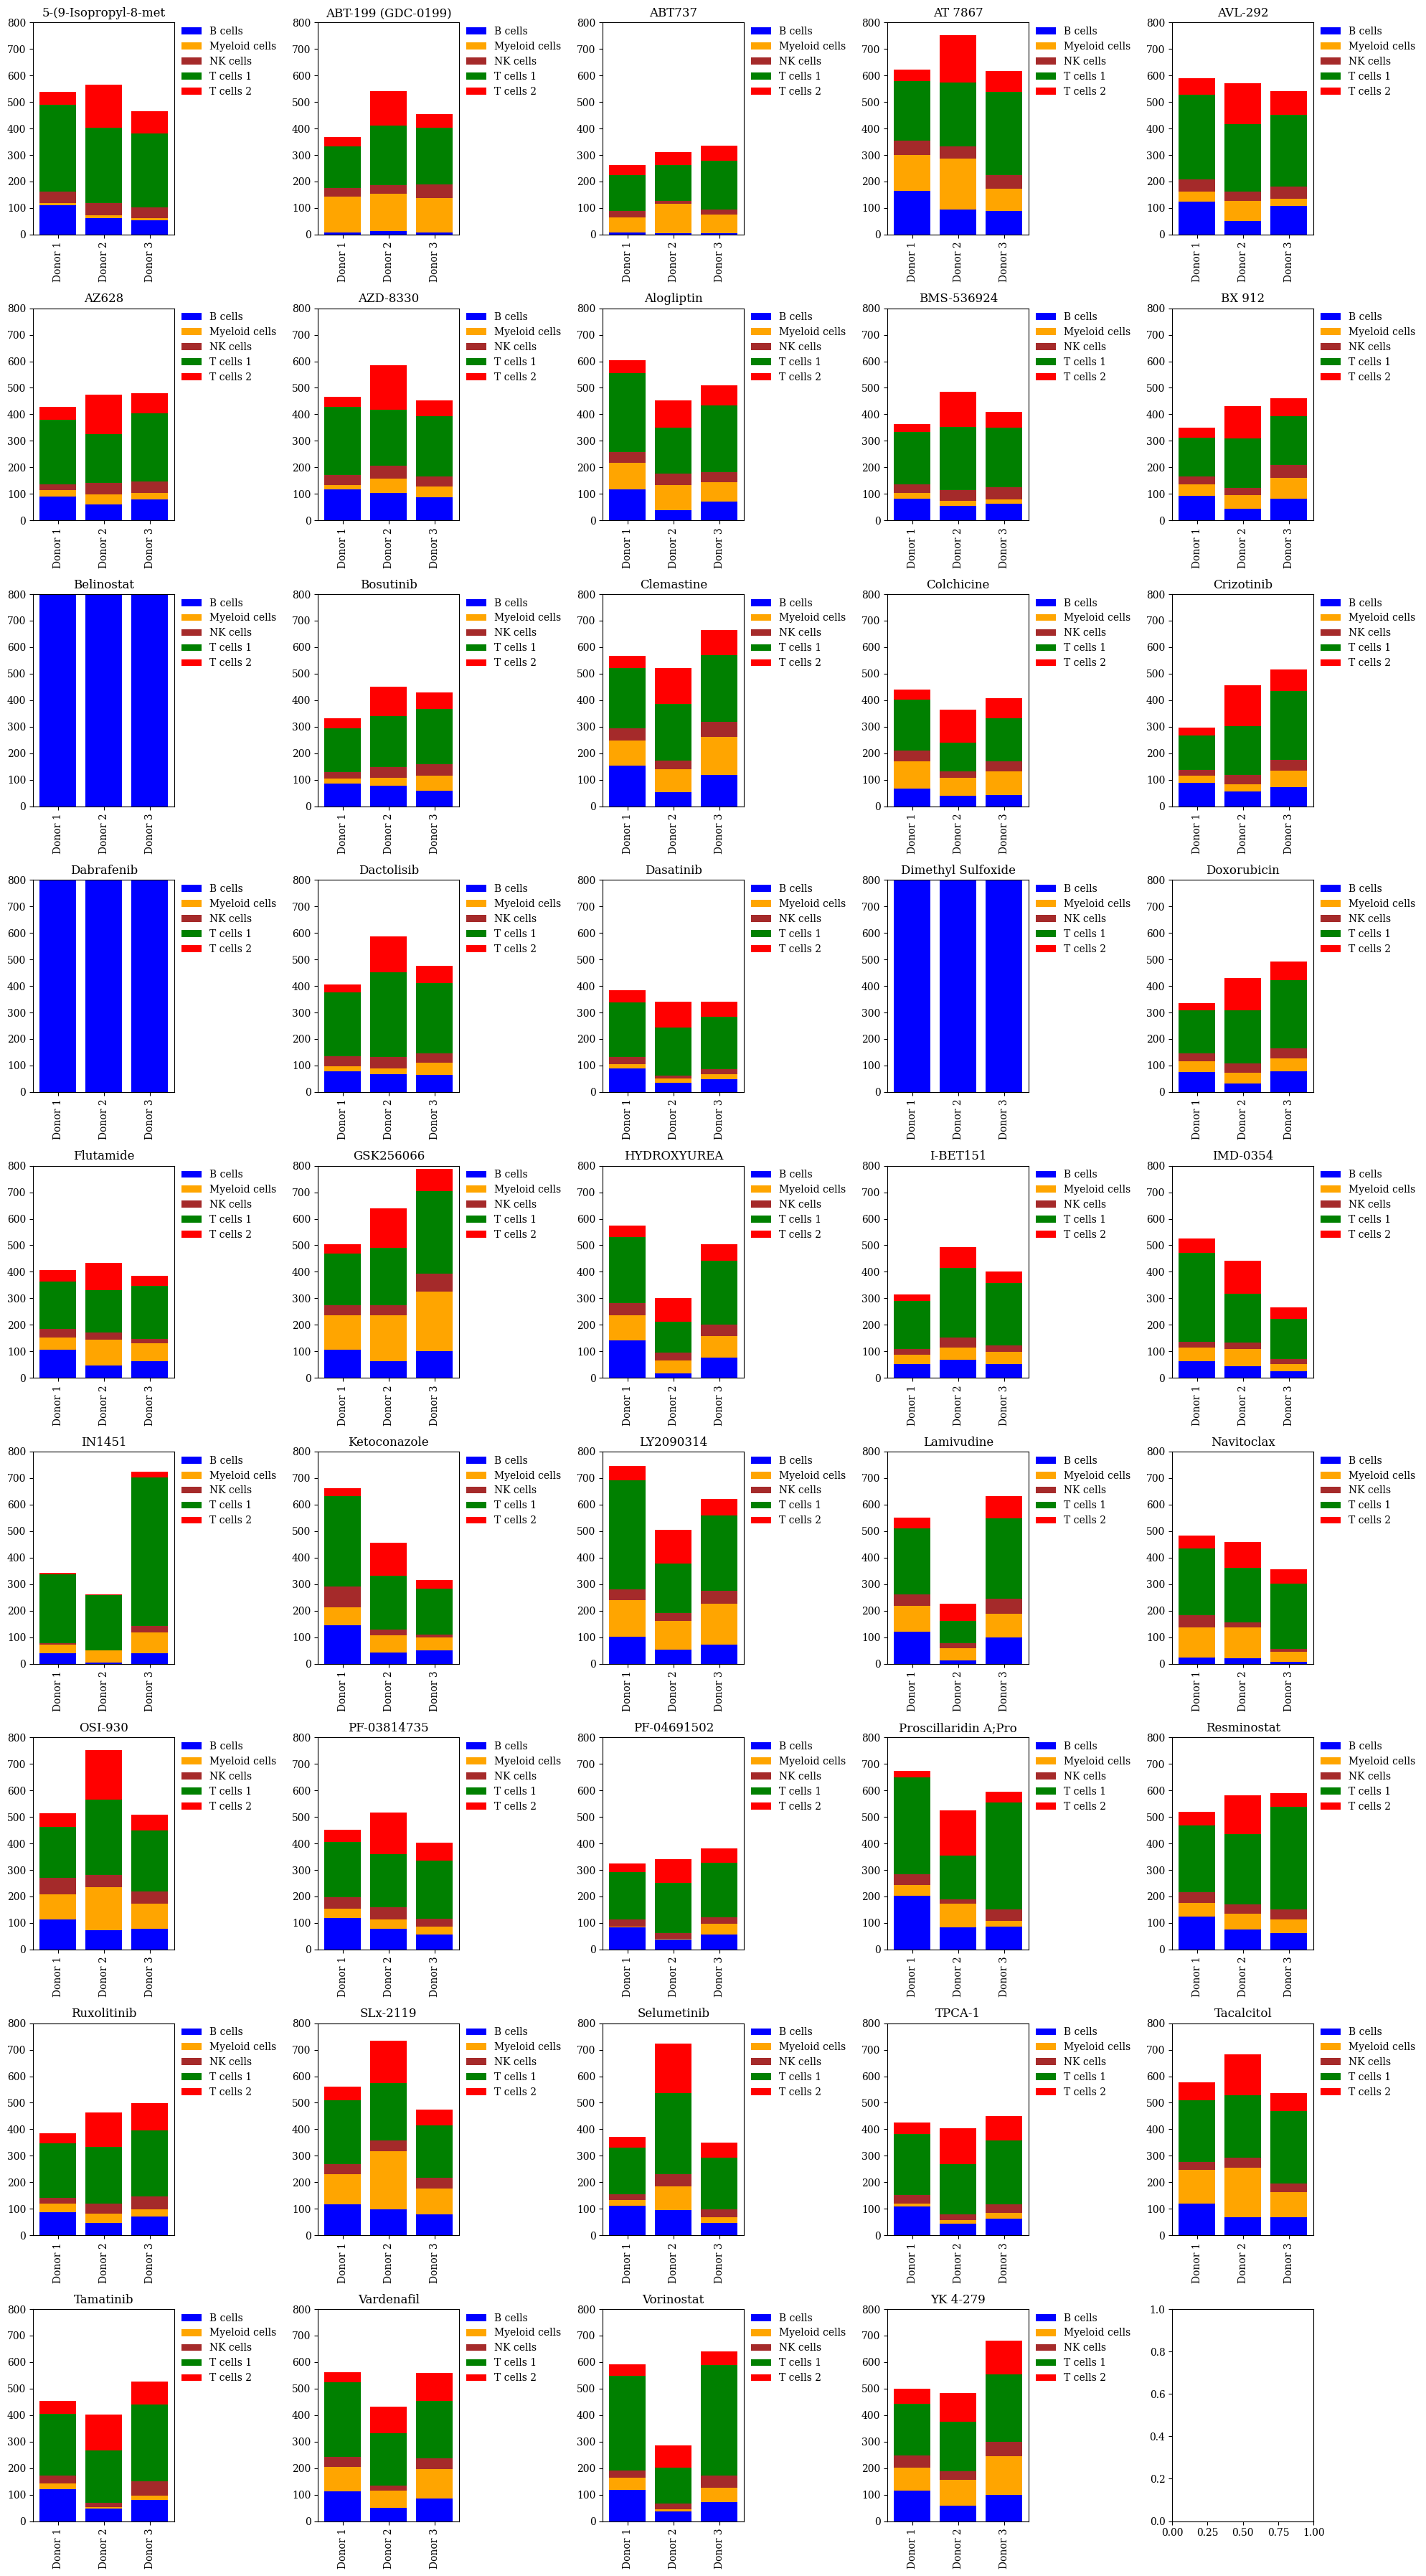

In [141]:
group_to_plot = all_outliers
n_cols = min([5, len(group_to_plot)])
n_rows = int(np.ceil(len(group_to_plot)/n_cols))
print(n_cols)


fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))

ax_list = []
obs_all = pd.concat([adata.obs for adata in adatas_all])[['donor_id','sm_name','cell_type_new']]
obs_all.sm_name = obs_all.sm_name.astype(str)

for i_compound, compound in enumerate(group_to_plot):
    i = i_compound // n_cols
    j = i_compound % n_cols
    if n_rows==1:
        ax = axes[j]
    else:
        ax = axes[i][j]
    # subset and format data
    obs = obs_all.loc[obs_all.sm_name==compound, :]
    df_subset = obs.groupby(['donor_id', 'cell_type_new']).size().to_frame().reset_index()
    cell_count_m = df_subset.pivot(index='donor_id', columns='cell_type_new', values=0)
    cell_count_m = cell_count_m.fillna(0)

    ax.set_ylim([0, 800])

    plot_stacked_bar_chart(cell_count_m, title=compound[0:20], xticklabels=cell_count_m.index.values, colors=None, figsize=(4, 4), ax=ax, legend=False, color_map=color_map_celltypes)
    ax_list.append(ax)
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, frameon=False)
plt.tight_layout()

In [243]:
common_outliers


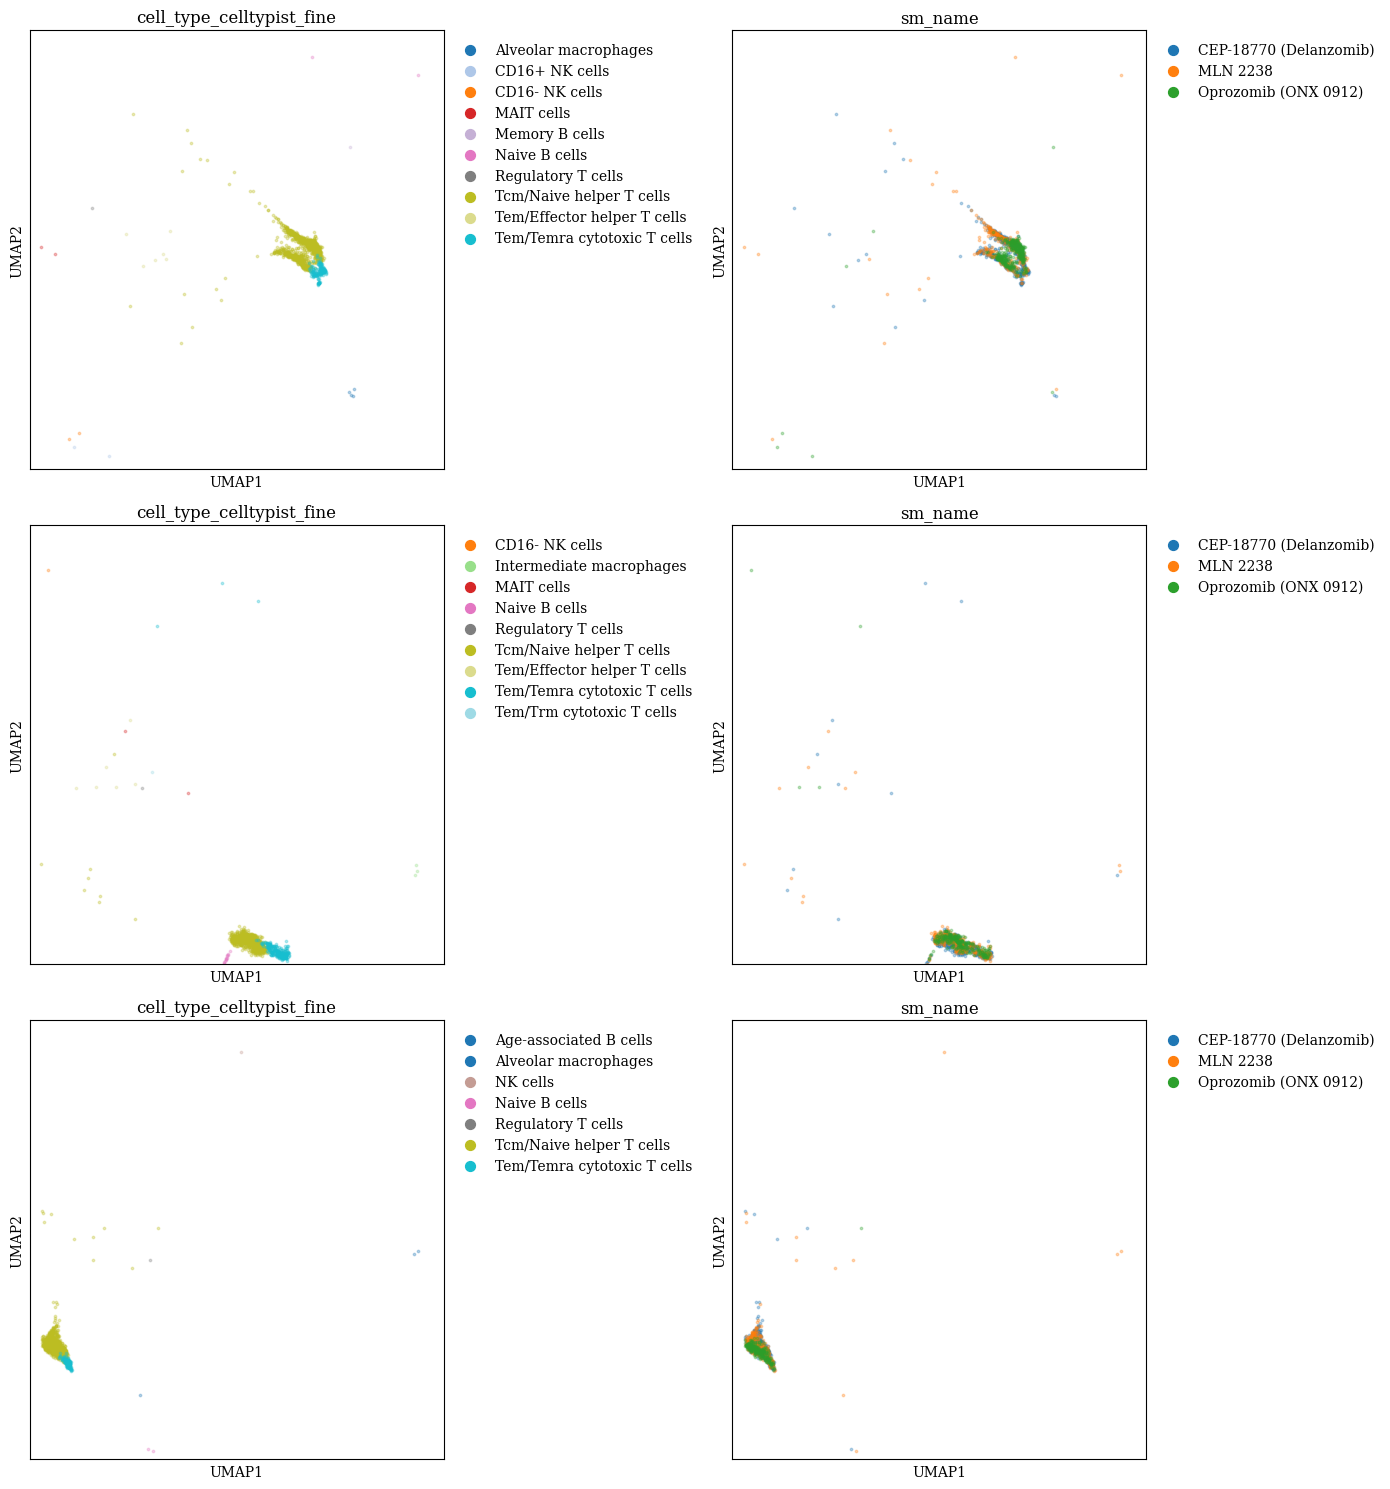

In [118]:
adata_all_outliers = []
for i, adata in enumerate(adatas_all):
    mask = adata.obs.sm_name.isin(new_outliers_1)
    adata_all_outliers.append(adata[mask,:])
    
fig = plot_umap_group_group(adata_all_outliers, ["cell_type_celltypist_fine", "sm_name" ], color_map=color_map, s=3)

### Outlier compounds

In [38]:
outliers_2_1 = ['Oprozomib (ONX 0912)','MLN 2238', 'CEP-18770 (Delanzomib)'] # big shift, less than 2 cells types left
outliers_2_2 = ['IN1451'] # big shift, less than 2 cells types left
outliers_2 = outliers_2_1 + outliers_2_2
outliers_3 = ['Ganetespib (STA-9090)', 'Proscillaridin A;Proscillaridin-A', 'AT13387'] # MOA not clear

2


NameError: name 'sc_counts' is not defined

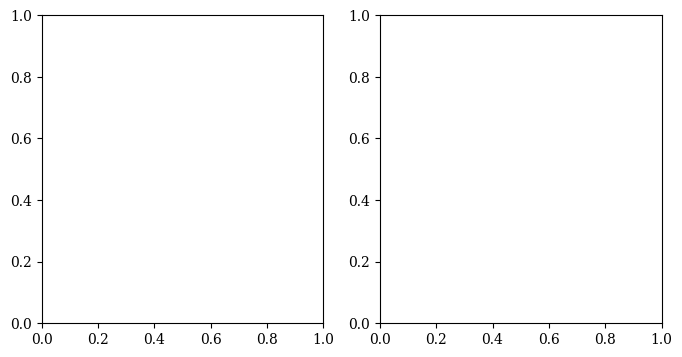

In [99]:
group_to_plot = new_outliers_2
n_cols = min([5, len(group_to_plot)])
n_rows = int(np.ceil(len(group_to_plot)/n_cols))
print(n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))

ax_list = []
for i_compound, compound in enumerate(group_to_plot):
    i = i_compound // n_cols
    j = i_compound % n_cols
    if n_rows==1:
        ax = axes[j]
    else:
        ax = axes[i][j]
    # subset and format data
    sc_counts_subset = sc_counts.obs[sc_counts.obs.sm_name==compound]
    cell_counts_df = sc_counts_subset.groupby(['donor_id', 'cell_type']).size().reset_index()
    cell_count_m = cell_counts_df.pivot(index='donor_id', columns='cell_type', values=0)
    cell_count_m = cell_count_m.fillna(0)
    ax.set_ylim([0, 800])
    plot_stacked_bar_chart(cell_count_m, title=compound[0:20], xticklabels=cell_count_m.index.values, colors=None, figsize=(4, 4), ax=ax, legend=False)
    ax_list.append(ax)
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, frameon=False)
plt.tight_layout()

In [269]:
fig.savefig('outliers1_cellcounts.png', dpi=300)

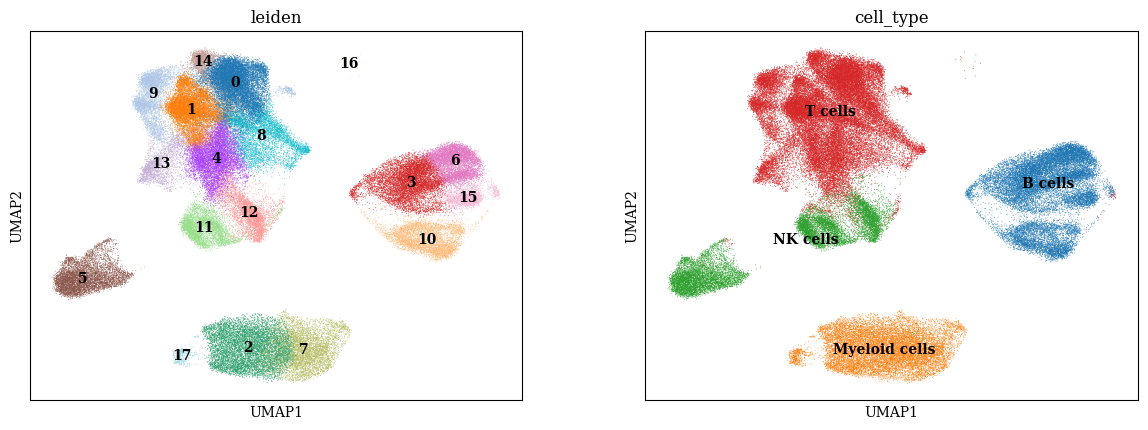

In [265]:
sc.pl.umap(
    sc_counts_donor_1,
    color=["leiden", "cell_type"],
    legend_loc="on data"
)

1273
1053
1044


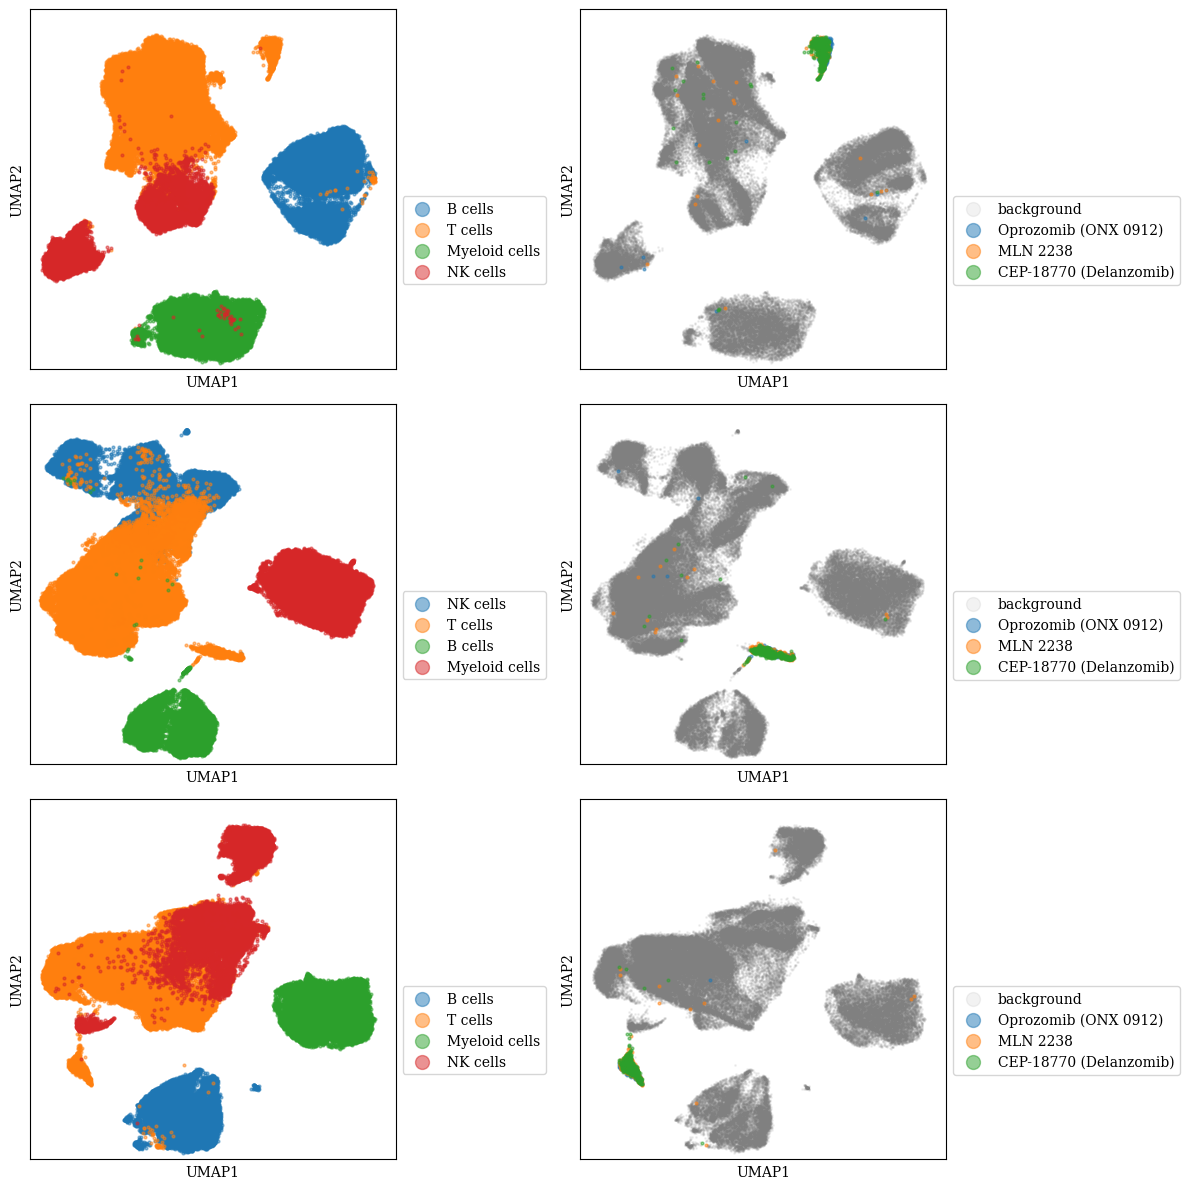

In [252]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
plot_umap(sc_counts_donor_1, color='cell_type', ax=axes[0][0])
plot_umap(sc_counts_donor_1, color='sm_name', ax=axes[0][1], groups=outliers_2_1)

plot_umap(sc_counts_donor_2, color='cell_type', ax=axes[1][0])
plot_umap(sc_counts_donor_2, color='sm_name', ax=axes[1][1], groups=outliers_2_1)

plot_umap(sc_counts_donor_3, color='cell_type', ax=axes[2][0])
plot_umap(sc_counts_donor_3, color='sm_name', ax=axes[2][1], groups=outliers_2_1)
plt.tight_layout()

In [266]:
fig.savefig('outliers1.png', dpi=300)

In [255]:
# remove outliers_2_1
sc_counts_donor_1 = sc_counts_donor_1[~sc_counts_donor_1.obs.sm_name.isin(outliers_2_1),:]
sc_counts_donor_2 = sc_counts_donor_2[~sc_counts_donor_2.obs.sm_name.isin(outliers_2_1),:]
sc_counts_donor_3 = sc_counts_donor_3[~sc_counts_donor_3.obs.sm_name.isin(outliers_2_1),:]

343
261
725


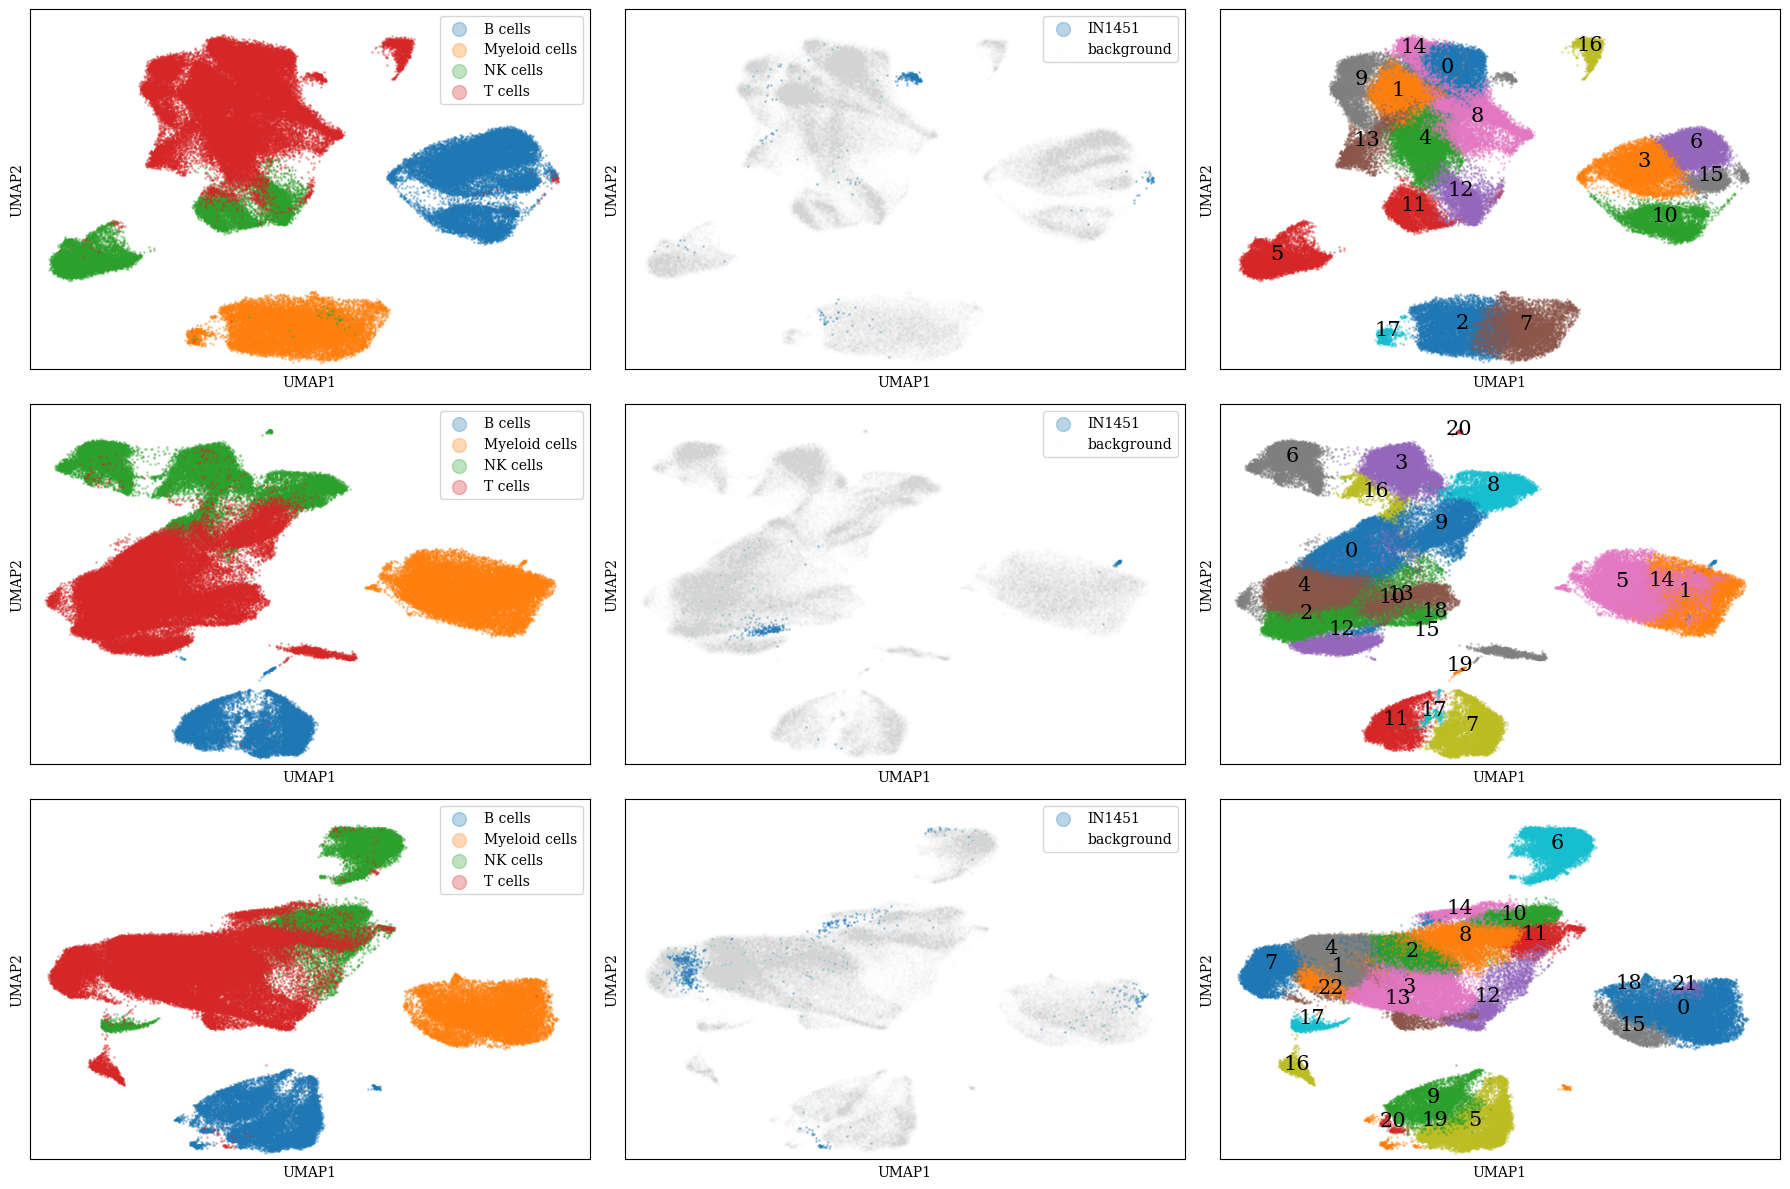

In [77]:

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
plot_umap(sc_counts_donor_1, color='cell_type', ax=axes[0][0])
plot_umap(sc_counts_donor_1, color='sm_name', ax=axes[0][1], groups=outliers_2_2)
plot_umap(sc_counts_donor_1, color='leiden', ax=axes[0][2])

plot_umap(sc_counts_donor_2, color='cell_type', ax=axes[1][0])
plot_umap(sc_counts_donor_2, color='sm_name', ax=axes[1][1], groups=outliers_2_2)
plot_umap(sc_counts_donor_2, color='leiden', ax=axes[1][2])


plot_umap(sc_counts_donor_3, color='cell_type', ax=axes[2][0])
plot_umap(sc_counts_donor_3, color='sm_name', ax=axes[2][1], groups=outliers_2_2)
plot_umap(sc_counts_donor_3, color='leiden', ax=axes[2][2])

plt.tight_layout()

In [267]:
fig.savefig('outliers2.png', dpi=300)

In [270]:
# remove outliers_2_2
sc_counts_donor_1 = sc_counts_donor_1[~sc_counts_donor_1.obs.sm_name.isin(outliers_2_2),:]
sc_counts_donor_2 = sc_counts_donor_2[~sc_counts_donor_2.obs.sm_name.isin(outliers_2_2),:]
sc_counts_donor_3 = sc_counts_donor_3[~sc_counts_donor_3.obs.sm_name.isin(outliers_2_2),:]

3


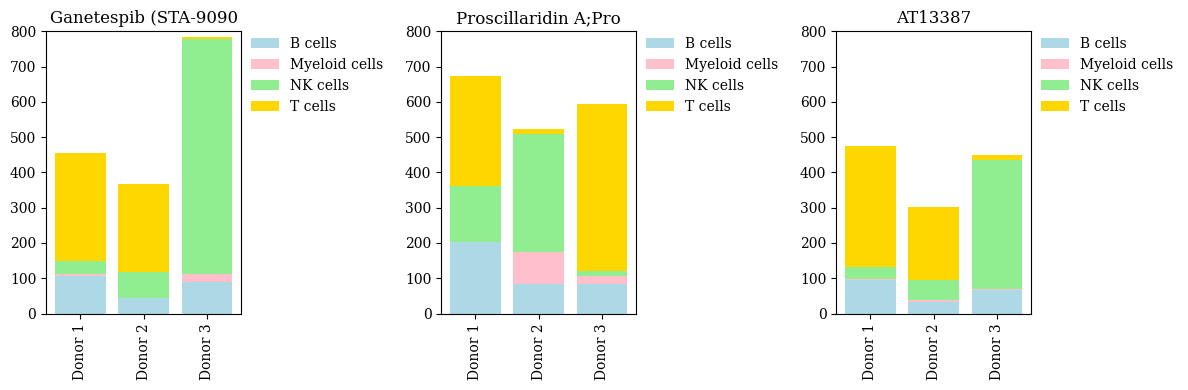

In [272]:
group_to_plot = outliers_3
n_cols = min([5, len(group_to_plot)])
n_rows = int(np.ceil(len(group_to_plot)/n_cols))
print(n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))

ax_list = []
for i_compound, compound in enumerate(group_to_plot):
    i = i_compound // n_cols
    j = i_compound % n_cols
    if n_rows==1:
        ax = axes[j]
    else:
        ax = axes[i][j]
    # subset and format data
    sc_counts_subset = sc_counts.obs[sc_counts.obs.sm_name==compound]
    cell_counts_df = sc_counts_subset.groupby(['donor_id', 'cell_type']).size().reset_index()
    cell_count_m = cell_counts_df.pivot(index='donor_id', columns='cell_type', values=0)
    cell_count_m = cell_count_m.fillna(0)
    ax.set_ylim([0, 800])
    plot_stacked_bar_chart(cell_count_m, title=compound[0:20], xticklabels=cell_count_m.index.values, colors=None, figsize=(4, 4), ax=ax, legend=False)
    ax_list.append(ax)
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, frameon=False)
plt.tight_layout()

In [273]:
fig.savefig('outliers3_cellcounts.png', dpi=300)

1603
1194
1828


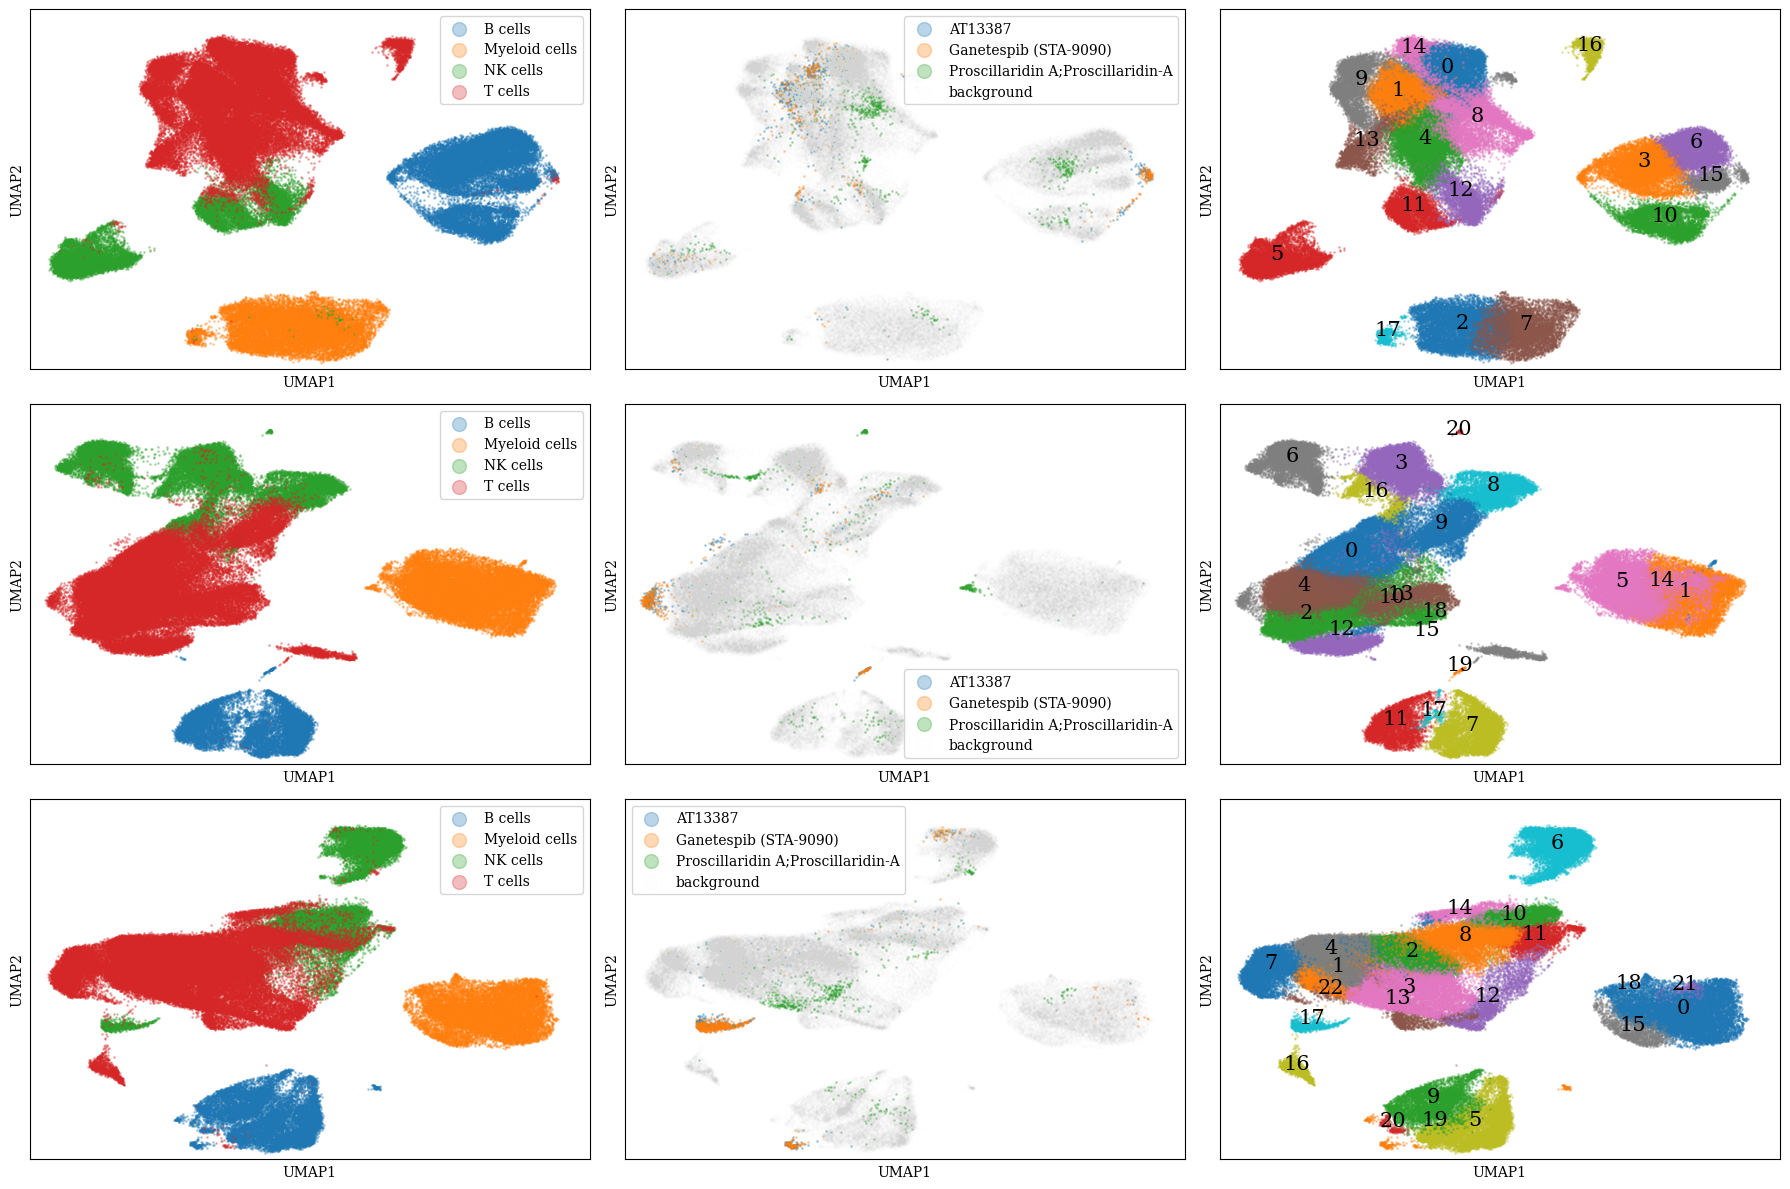

In [78]:

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
plot_umap(sc_counts_donor_1, color='cell_type', ax=axes[0][0])
plot_umap(sc_counts_donor_1, color='sm_name', ax=axes[0][1], groups=outliers_3)
plot_umap(sc_counts_donor_1, color='leiden', ax=axes[0][2])

plot_umap(sc_counts_donor_2, color='cell_type', ax=axes[1][0])
plot_umap(sc_counts_donor_2, color='sm_name', ax=axes[1][1], groups=outliers_3)
plot_umap(sc_counts_donor_2, color='leiden', ax=axes[1][2])


plot_umap(sc_counts_donor_3, color='cell_type', ax=axes[2][0])
plot_umap(sc_counts_donor_3, color='sm_name', ax=axes[2][1], groups=outliers_3)
plot_umap(sc_counts_donor_3, color='leiden', ax=axes[2][2])

plt.tight_layout()

In [275]:
fig.savefig('outliers3.png', dpi=300)